#**📘 1. ƏSAS ANLAYIŞLAR**

## 🔹 1.1 Reqressiya və Klassifikasiya

- **Reqressiya (Regression)** modelləri, kəsilməz (numerical) bir dəyişəni proqnozlaşdırır.
  > Məsələn: Evin qiyməti, temperatur, maaş və s.

- **Klassifikasiya (Classification)** modelləri, kateqorik (categorical) bir nəticəni proqnozlaşdırır.
  > Məsələn: E-poçt spamdır, yoxsa yox? Müştəri bir malı alacaq, yoxsa yox?

➡️ Loqistik **reqressiya**, adına baxmayaraq, bir **klassifikasiya alqoritmidir.**

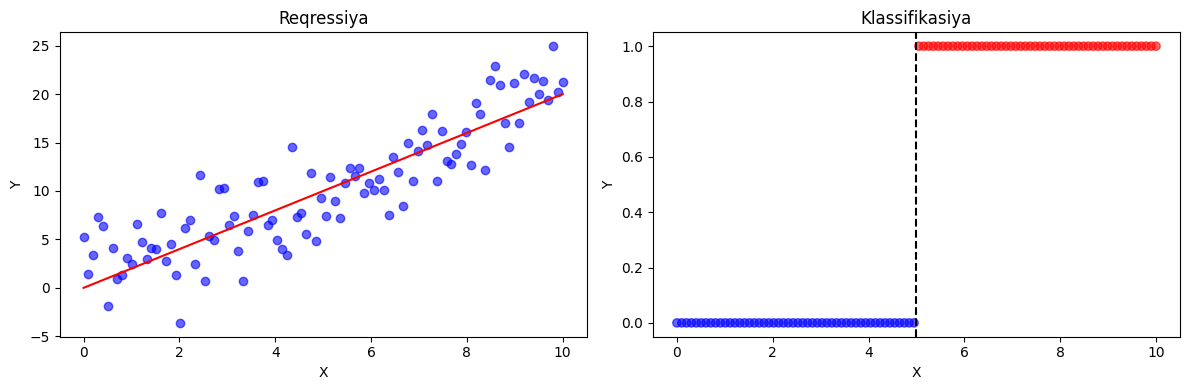

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.linspace(0, 10, 100)
y_reg = 2 * X + np.random.normal(0, 3, 100)
y_cls = (X > 5).astype(int)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(X, y_reg, color='blue', alpha=0.6)
axs[0].plot(X, 2*X, color='red')
axs[0].set_title("Reqressiya")

axs[1].scatter(X, y_cls, c=y_cls, cmap='bwr', alpha=0.6)
axs[1].axvline(5, color='black', linestyle='--')
axs[1].set_title("Klassifikasiya")

for ax in axs:
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

plt.tight_layout()
plt.show()

## 🔹 1.2 Niyə Proqnoz Yox, Ehtimal?

- Xətti reqressiya 0 ilə 1-dən kənar dəyərləri proqnozlaşdıra bilər → klassifikasiyada isə bu **məntiqsiz** olar.
- Loqistik reqressiya bu problemi **ehtimal proqnozu** ilə həll edir:

Əvvəlcə ehtimal hesablanır:

$$p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}$$

Sonra sinifə qərar verilir (məsələn, hədd 0.5):

- $$p\geq 0.5 \Rightarrow \text{sinif} = 1$$
- $$p < 0.5 \Rightarrow \text{sinif} = 0$$

###Üstünlüyü:
- Ehtimal sayəsində modelin **nə qədər əmin** olduğunu öyrənə bilərik.
- Qərar həddini (threshold) problemin təbiətinə görə tənzimləyə bilərik.

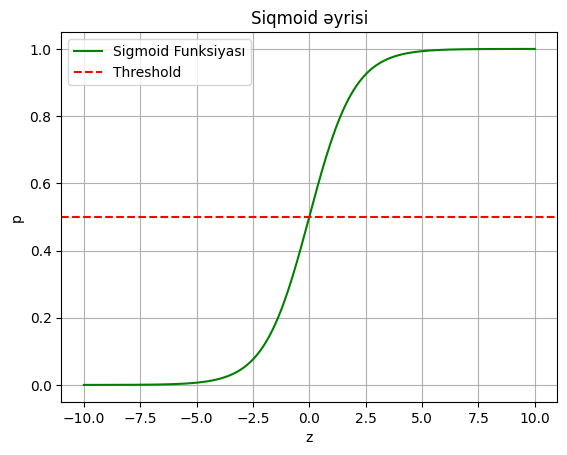

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
p = sigmoid(z)

plt.plot(z, p, label="Sigmoid Funksiyası", color='green')
plt.axhline(0.5, linestyle='--', color='red', label='Threshold')
plt.title("Siqmoid əyrisi")
plt.xlabel("z")
plt.ylabel("p")
plt.grid(True)
plt.legend()
plt.show()

## 🔹 1.3 Klassifikasiyanın Növləri

### ✅ 1.3.1 İkili Klassifikasiya (Binary Classification)
- İki sinif var: 0 və ya 1
> Məsələn: Şəxs Xəstədirmi? (Bəli/Xeyr)

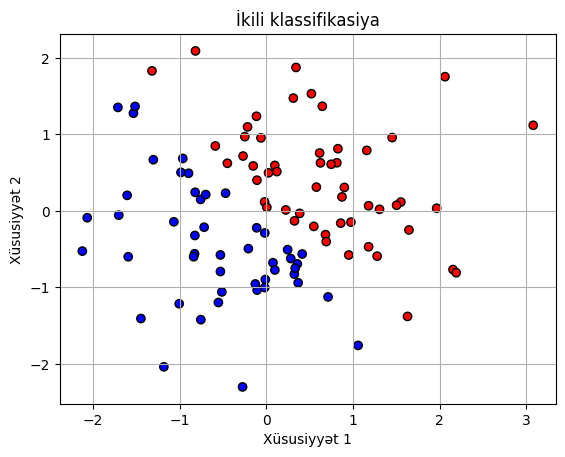

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("İkili klassifikasiya")
plt.xlabel("Xüsusiyyət 1")
plt.ylabel("Xüsusiyyət 2")
plt.grid(True)
plt.show()

### ✅ 1.3.2 Çoxsinifli Klassifikasiya (Multiclass Classification)
- Birdən çox sinif var, lakin **hər müşahidə yalnız bir sinifə** aiddir.
> Məsələn: Müştəri A, B və ya C paketlərindən birini seçir.

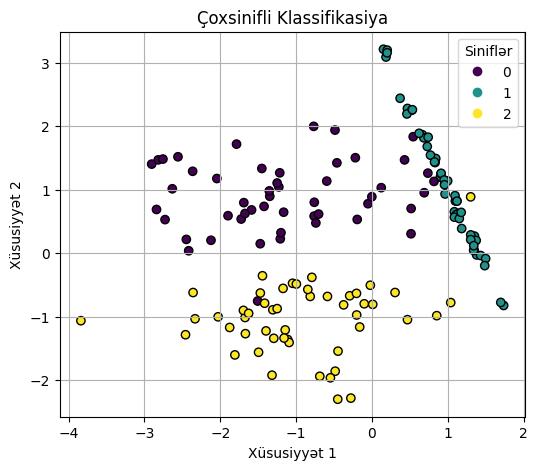

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples=150,
                           n_features=2,
                           n_redundant=0,
                           n_classes=3,
                           n_clusters_per_class=1,
                           random_state=42)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Çoxsinifli Klassifikasiya")
plt.xlabel("Xüsusiyyət 1")
plt.ylabel("Xüsusiyyət 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Siniflər")
plt.show()

### ✅ 1.3.3 Çoxetiketli Klassifikasiya (Multilabel Classification)
- Bir müşahidə **eyni zamanda birdən çox sinifə** aid ola bilər.
> Məsələn: Bir xəbər həm “idman”, həm də “siyasət” kateqoriyasına aid ola bilər.

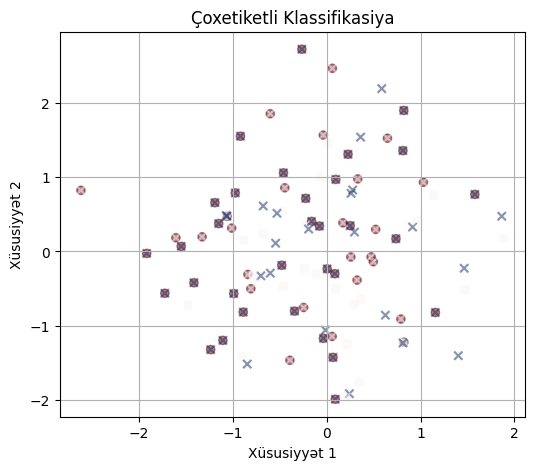

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
X = np.random.randn(100, 2)
labels = {
    'Etiket A': np.random.randint(0, 2, 100),
    'Etiket B': np.random.randint(0, 2, 100)
}

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels['Etiket A'], cmap='Reds', marker='o', label='Etiket A', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=labels['Etiket B'], cmap='Blues', marker='x', label='Etiket B', alpha=0.5)

plt.title("Çoxetiketli Klassifikasiya")
plt.xlabel("Xüsusiyyət 1")
plt.ylabel("Xüsusiyyət 2")
plt.grid(True)
plt.show()

## 🔹 1.4 Loqistik Reqressiya Nə Zaman İstifadə Edilir?

Loqistik reqressiya aşağıdakı hallarda üstünlük verilir:

- ✅ Hədəf dəyişən **kateqorikdirsə** (adətən 0/1),
- ✅ Sərbəst dəyişənlər **ədədi və ya kateqorik (dummy) olaraq kodlanıbsa**,
- ✅ Proqnoz yox, **ehtimal üzərindən qərar** verilmək istənilirsə,
- ✅ Modelin **şərh edilə bilməsi** vacibdirsə (məsələn, səhiyyə, hüquq, iqtisadiyyat),

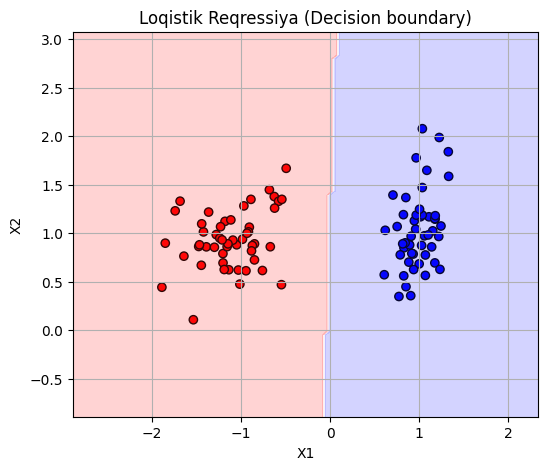

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=1)

model = LogisticRegression().fit(X, y)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')

plt.title("Loqistik Reqressiya (Decision boundary)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

#**📘 2. MODELİN RİYAZİ ƏSASLARI**
(Loqistik Reqressiyanın Quruluşu, Düsturu və Ehtimal Hesablanması)

## 🔹 2.1 Niyə Xətti Model Yox?

Xətti reqressiya klassifikasiyada istifadə edilsəydi, nəticə belə olardı:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n
$$

Lakin bu modelin nəticəsi istənilən ədəd ola bilər: -1.2, 0.8, 3.4, və s.

Lakin klassifikasiya problemlərində:

- Nəticə $$ [0, 1] $$ aralığında **bir ehtimal** olmalıdır.
- Buna görə də nəticəni bu aralığa **sıxmaq** lazımdır.

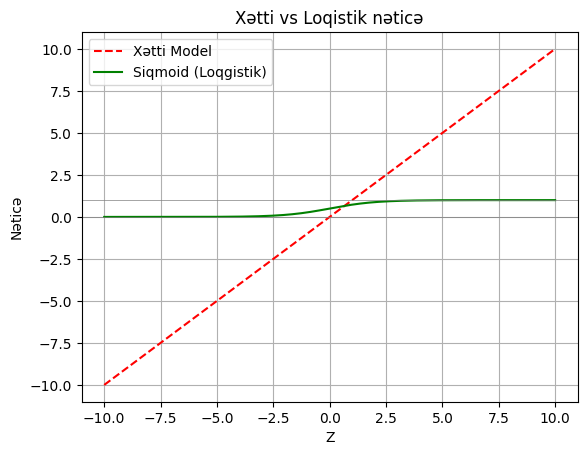

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 200)
y_linear = X
y_sigmoid = 1 / (1 + np.exp(-X))

plt.plot(X, y_linear, label='Xətti Model', linestyle='--', color='red')
plt.plot(X, y_sigmoid, label='Siqmoid (Loqgistik)', color='green')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axhline(1, color='gray', linewidth=0.5)
plt.title("Xətti vs Loqistik nəticə")
plt.xlabel("Z")
plt.ylabel("Nəticə")
plt.legend()
plt.grid(True)
plt.show()

## 🔹 2.2 Logit Funksiyası və Əmsal Anlayışı

Bir hadisənin baş vermə ehtimalı p olarsa, baş verməmə ehtimalı 1 - p olar.\
Bu iki dəyər nisbətləndikdə **əmsal (odds) (ehtimal nisbəti)** əldə edilir:

$$
\text{odds} = \frac{p}{1 - p}
$$

Odds şərhi:
- $$\text{odds} = 1$$ baş vermə və baş verməmə ehtimalı bərabərdir
- $$> 1$$ baş vermə ehtimalı daha yüksəkdir
- $$< 1$$ baş verməmə ehtimalı daha yüksəkdir

Loqistik reqressiyada odds'un **loqarifmi** (log-odds və ya **logit**) götürülür:

### 📌 Logit funksiyası:

$$
\text{logit}(p) = \log\left(\frac{p}{1 - p}\right)
$$

Bu transformasiya sayəsində nəticə $$(-\infty, +\infty)$$ aralığına yayılır.

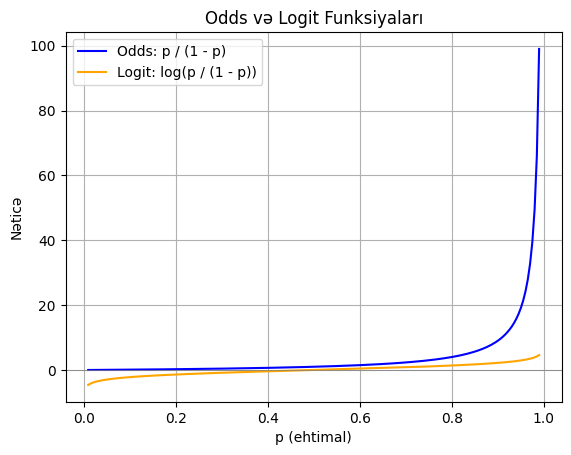

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.01, 0.99, 200)
odds = p / (1 - p)
logit = np.log(odds)

plt.plot(p, odds, label='Odds: p / (1 - p)', color='blue')
plt.plot(p, logit, label='Logit: log(p / (1 - p))', color='orange')
plt.axhline(0, color='gray', linewidth=0.5)
plt.xlabel("p (ehtimal)")
plt.ylabel("Nəticə")
plt.title("Odds və Logit Funksiyaları")
plt.legend()
plt.grid(True)
plt.show()

## 🔹 2.3 Loqistik Reqressiya Modelinin Tənliyi

Loqistik reqressiyada logit(p), xətti reqressiya şəklində ifadə edilir:

$$
\log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Sol tərəf loqit (log-odds), sağ tərəf xətti modeldir.

## 🔹 2.4 Ehtimalın Proqnozlaşdırılması (Siqmoid Funksiyası)

Bu tənlik $$p$$ ilə yenidən yazılsa:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$

Bu düstur **siqmoid funksiyası** kimi tanınır.

### ✅ Xüsusiyyətləri:
- Çıxış aralığı: $$ (0, 1) $$
- Z böyüdükcə $$p \to 1$$
- Z kiçildikcə $$p \to 0$$
- $$z = 0$$ üçün $$p = 0.5$$ → Qərar sərhədi (Threshold)

## 🔹 2.5 Siqmoid Funksiyası

Funksiyanın riyazi şəkli:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- Z oxu: modelin hesabladığı xətti nəticə
- Y oxu: proqnozlaşdırılan **ehtimal**

## ✅ 2.6 Xülasə – Loqistik Reqressiya Prosesi

1. Xətti skor hesablanır:

$$
z = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n
$$

2. Siqmoid ilə ehtimala çevrilir:

$$
p = \frac{1}{1 + e^{-z}}
$$

3. Sinif müəyyən edilir:

- $$p \geq 0.5 \Rightarrow \text{sinif} = 1$$
- $$p < 0.5 \Rightarrow \text{sinif} = 0$$

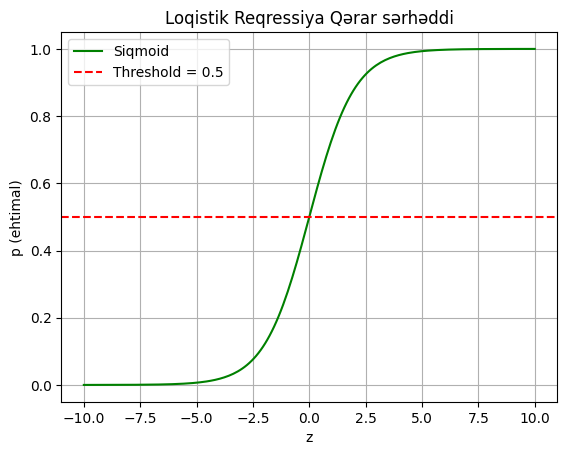

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 200)
p = 1 / (1 + np.exp(-z))

plt.plot(z, p, color='green', label='Siqmoid')
plt.axhline(0.5, linestyle='--', color='red', label='Threshold = 0.5')
plt.title("Loqistik Reqressiya Qərar sərhəddi")
plt.xlabel("z")
plt.ylabel("p (ehtimal)")
plt.grid(True)
plt.legend()
plt.show()

#**📘 3. FƏRZİYYƏLƏR**
(Loqistik Reqressiyanın Etibarlı Olması Üçün Tələb Olunan Şərtlər)

## 🔹 3.1 Asılı Dəyişənin Kateqorik Olması

Loqistik reqressiyanın əsas məqsədi **klassifikasiya** etməkdir.

Ən geniş yayılmış hal: **ikili (binary) klassifikasiya**

Asılı dəyişən: $$ y \in \{0, 1\} $$

Nümunə: Xəstədir? Bəli (1) / Xeyr (0)

Loqistik reqressiya çoxsinifli (multiclass) və çoxetiketli (multilabel) strukturlara da genişləndirilə bilər.

Lakin hər halda hədəf dəyişən **kateqorik** olmalıdır.

> 📌 Əgər kəsilməz (numerical) bir dəyər proqnozlaşdırılırsa, loqistik reqressiya deyil, xətti reqressiya istifadə olunur.

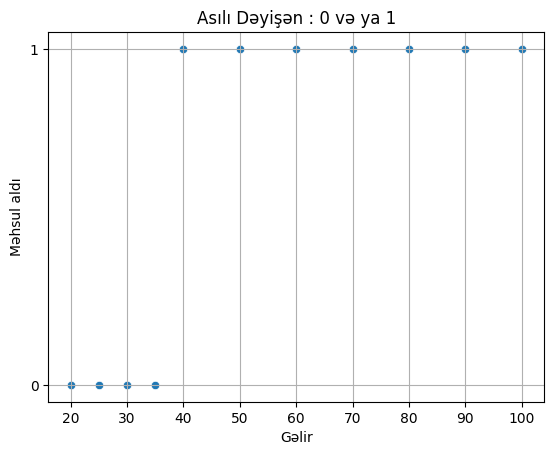

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "Gəlir": [20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100],
    "Məhsul Aldı": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
})

sns.scatterplot(x="Gəlir", y="Məhsul Aldı", data=df)
plt.title("Asılı Dəyişən : 0 və ya 1")
plt.xlabel("Gəlir")
plt.ylabel("Məhsul aldı")
plt.yticks([0, 1])
plt.grid(True)
plt.show()

## 🔹 3.2 Müşahidələrin Bir-birindən Asılı Olmaması

Modelin əsas fərziyyələrindən biri hər müşahidənin müstəqil olmasıdır.

- Bir sətirdəki müşahidə nəticəsi, başqa bir sətrin nəticəsi ilə əlaqəli olmamalıdır.
- Zaman asılılığı (time series) və ya eyni xüsusiyyətdən təkrarlanan ölçmələr varsa, bu fərziyyə pozulur.

> 📌 Belə hallar üçün zaman seriyası (time series) və ya mixed-effects modelləri uyğundur.

## 🔹 3.3 Inputlar (X) ilə logit(p) Arasında Xətti Əlaqə Olması

Bu fərziyyə, loqistik reqressiyanın ən kritik strukturlarından biridir.

Loqistik reqressiya bunu fərz edir:

$$
\text{logit}(p) = \log\left( \frac{p}{1 - p} \right) = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n
$$

Yəni **logit(p)** ilə müstəqil dəyişənlər arasında **xətti bir əlaqə** olmalıdır.

Əgər bu əlaqə xətti deyilsə:

- Box-Tidwell testi və ya
- Qismən qalıq (Partial residual) qrafikləri ilə yoxlama aparılmalıdır.

> 📌 Lazım gələrsə dəyişənlərə transformasiya (log, root, polynomial) tətbiq edilməlidir.

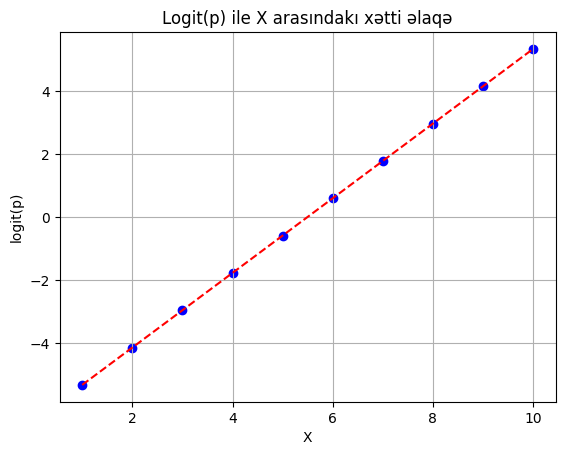

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model = LogisticRegression()
model.fit(X, y)

z = model.decision_function(X)
plt.scatter(X, z, color='blue')
plt.plot(X, z, linestyle='--', color='red')
plt.xlabel("X")
plt.ylabel("logit(p)")
plt.title("Logit(p) ile X arasındakı xətti əlaqə")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

np.random.seed(1)
X1 = np.random.uniform(1, 10, 100)
X2 = np.random.uniform(1, 10, 100)
log_X1 = X1 * np.log(X1)
log_X2 = X2 * np.log(X2)
y = (0.5*X1 - 0.2*X2 + np.random.normal(0, 2, 100)) > 5
y = y.astype(int)

df = pd.DataFrame({"X1": X1, "X2": X2, "X1log": log_X1, "X2log": log_X2, "y": y})

X = sm.add_constant(df[["X1", "X1log", "X2", "X2log"]])
model = sm.Logit(df["y"], X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.229009
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.3391
Time:                        09:16:33   Log-Likelihood:                -22.901
converged:                       True   LL-Null:                       -34.652
Covariance Type:            nonrobust   LLR p-value:                 0.0001005
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6614      6.262     -0.744      0.457     -16.935       7.612
X1            -0.4314      2.

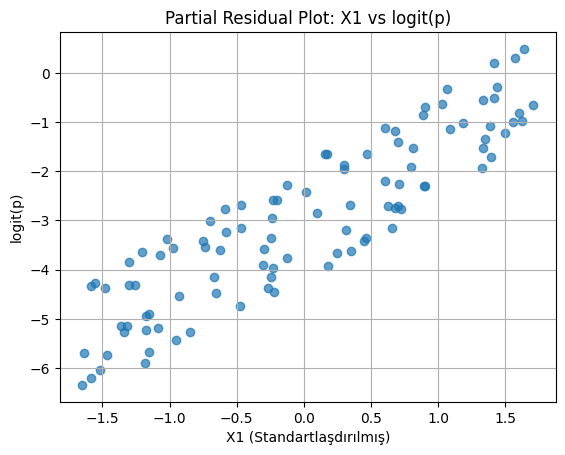

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df[["X1", "X2"]])
y = df["y"]

model = LogisticRegression()
model.fit(X_std, y)
logit_p = model.decision_function(X_std)

plt.scatter(X_std[:, 0], logit_p, alpha=0.7)
plt.title("Partial Residual Plot: X1 vs logit(p)")
plt.xlabel("X1 (Standartlaşdırılmış)")
plt.ylabel("logit(p)")
plt.grid(True)
plt.show()

## 🔹 3.4 Çoxlu Xəttilik (Multicollinearity) Olmamalı

Giriş dəyişənləri bir-biri ilə yüksək korrelyasiyaya malikdirsə:

- Əmsalların etibarlılığı azalır
- Standart xətalar böyüyür

Həll: **VIF (Variance Inflation Factor)** ilə yoxlanılır.

> 📌 Adətən VIF > 5 xəbərdarlıqdır, VIF > 10 ciddi problem sayılır.

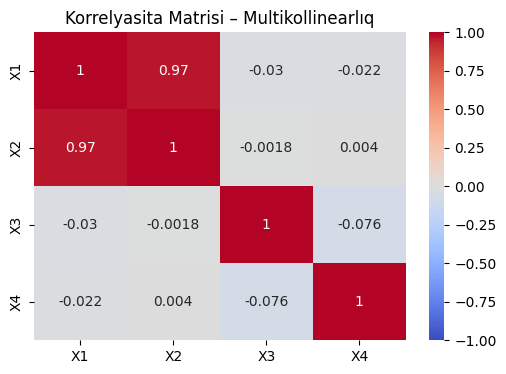

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

X1 = np.random.normal(0, 1, 100)

X2 = 0.2 * X1 + np.random.normal(0, 0.05, 100)

X3 = np.random.uniform(0, 1, 100)
X4 = np.random.normal(5, 2, 100)

df = pd.DataFrame({
    "X1": X1,
    "X2": X2,
    "X3": X3,
    "X4": X4
})

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelyasita Matrisi – Multikollinearlıq")
plt.show()

## 🔹 3.5 Kifayət Qədər Müşahidə

Loqistik reqressiya maksimum ehtimal (maximum likelihood) metoduna əsaslanır.
Bu da böyük dataset tələb edir.

### Ümumi təklif:

- Hər müstəqil dəyişən üçün **ən azı 10** müşahidə
- Mümkündürsə **20+** müşahidə (xüsusilə aşağı tezlikli siniflər varsa)

Az müşahidə ilə:

- Model qeyri-sabitləşir
- Əmsallar şişir
- Konvergensiya problemləri yarana bilər

> 📌 Bu halda regularization, bootstrap və ya Bayesian modellər nəzərdən keçirilə bilər.

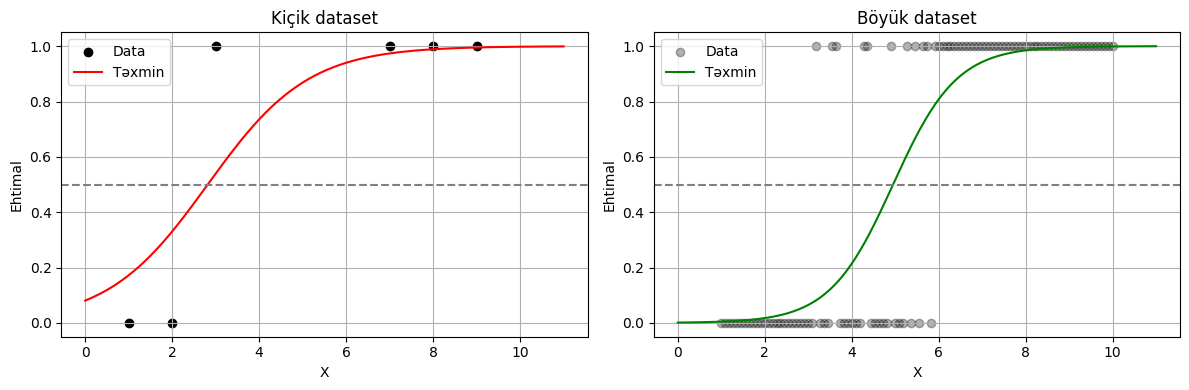

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X_small = np.array([[1], [2], [3], [7], [8], [9]])
y_small = np.array([0, 0, 1, 1, 1, 1])

np.random.seed(0)
X_large = np.linspace(1, 10, 100).reshape(-1, 1)
y_large = (X_large.ravel() + np.random.normal(0, 1, 100)) > 5
y_large = y_large.astype(int)

model_small = LogisticRegression()
model_large = LogisticRegression()
model_small.fit(X_small, y_small)
model_large.fit(X_large, y_large)

X_range = np.linspace(0, 11, 300).reshape(-1, 1)
probs_small = model_small.predict_proba(X_range)[:, 1]
probs_large = model_large.predict_proba(X_range)[:, 1]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(X_small, y_small, color="black", label="Data")
axs[0].plot(X_range, probs_small, color="red", label="Təxmin")
axs[0].axhline(0.5, linestyle="--", color="gray")
axs[0].set_title("Kiçik dataset")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Ehtimal")
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(X_large, y_large, alpha=0.3, color="black", label="Data")
axs[1].plot(X_range, probs_large, color="green", label="Təxmin")
axs[1].axhline(0.5, linestyle="--", color="gray")
axs[1].set_title("Böyük dataset")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Ehtimal")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

#**📘 4. Modelin Qiymətləndirilməsi**

Loqistik reqressiya modelləri klassifikasiya etdiyi üçün klassik reqressiya göstəricilərindən fərqli olaraq, klassifikasiyanın doğruluğunu  ölçən xüsusi göstəricilər istifadə olunur.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score,
    log_loss, precision_recall_curve,
    average_precision_score
)

X, y = make_classification(n_samples=300, n_features=5, n_informative=3,
                           n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

## 🔢 4.1. Qarışıqlıq Matrisi (Confusion Matrix)

|                  | Actual = 1 | Actual = 0 |
|------------------|--------------------|---------------------|
| Predicted = 1       | TP (True Positive) | FP (False Positive) |
| Predicted = 0       | FN (False Negative)| TN (True Negative)  |

**İzahı:**
- TP: Xəstə olan birinə “xəstə” demək
- FP: Sağlam birinə “xəstə” demək (yanlış həyəcan)
- FN: Xəstə birinə “sağlam” demək (çox təhlükəli)
- TN: Sağlam birinə “sağlam” demək

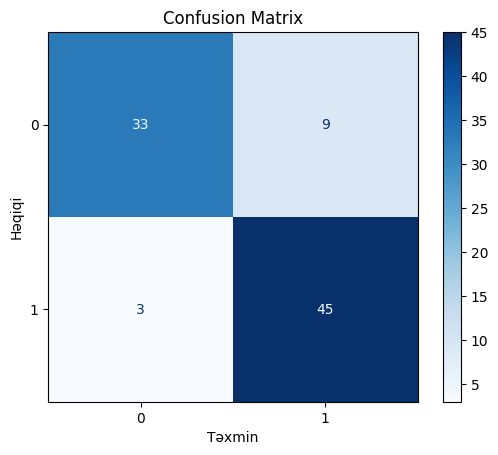

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        42
           1       0.83      0.94      0.88        48

    accuracy                           0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Təxmin")
plt.ylabel("Həqiqi")
plt.grid(False)
plt.show()

print(classification_report(y_test, y_pred))

## 📏 4.2. Dəqiqlik (Accuracy)

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- Ümumi müvəffəqiyyət dərəcəsidir.
- Lakin balanssız siniflərdə yanıldıcı ola bilər.
- Xəstəxana məsələsində, modelin xəstələrdən və sağlamlardan neçəsini doğru tapdığını göstərir.

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.867


## 🎯 4.3. Kəskinlik (Precision)

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- Modelin “pozitiv” dediyi nümunələrin nə qədər doğru olduğunu ölçür.
- Yanlış pozitiv hallarda vacibdir.
- Xəstəxana məsələsində, modelin xəstə dediklərinin həqiqətən nə qədərinin xəstə olduğunu göstərir.

In [ ]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")

Precision: 0.833


## 💡 Həssaslıq (Recall)

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- Həqiqi pozitivləri tapma dərəcəsidir.
- Yanlış neqativlərin (buraxılmış pozitivlərin) vacib olduğu hallarda əhəmiyyətlidir.
- Xəstəxana məsələsində, həqiqətən xəstə olanlardan neçəsinin doğru tapılmasıdır.

In [ ]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.3f}")

Recall: 0.938


## ⚖️ 4.5. F1-Skor (Harmonik Orta)

$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- Kəskinlik (Precision) və Həssaslıq (Recall) arasında balansı ölçür.
- Xüsusilə balanssız (imbalanced) datasetlərdə faydalıdır.

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.3f}")

F1 Score: 0.882


## 📉 4.6. ROC Əyrisi və AUC

- **ROC əyrisi:** TPR (True Positive Rate) vs FPR (False Positive Rate)
- **AUC:** ROC əyrisinin altında qalan sahə

**Şərh:**
- AUC = 1.0 → mükəmməl model
- AUC = 0.5 → tamamilə təsadüfi
- AUC ≥ 0.8 → güclü model

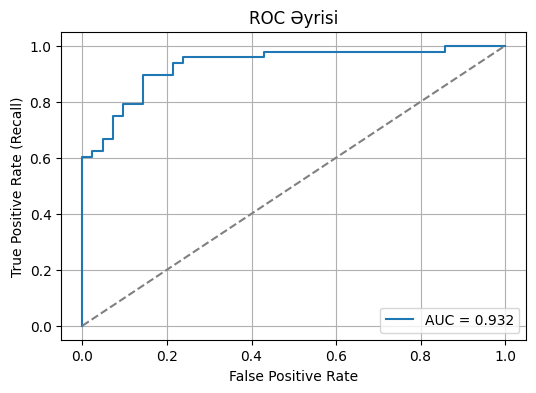

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Əyrisi")
plt.legend()
plt.grid(True)
plt.show()

## 📦 4.7. Log-loss (Loqarifmik Xəta)

$$
\text{LogLoss} = -\frac{1}{n} \sum_{i=1}^{n} \left[y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i)\right]
$$

- Modelin ehtimal proqnozlarının nə qədər “dəqiq” olduğunu ölçür.
- Yanlış klassifikasiyada aşağı ehtimal → böyük cəza

In [ ]:
logloss = log_loss(y_test, y_proba)
print(f"Log-loss: {logloss:.4f}")

Log-loss: 0.3250


## 📊 4.8. Kəskinlik-Həssaslıq Əyrisi (Precision-Recall Curve)

- ROC-a alternativ olaraq Kəskinlik və Həssaslıq dəyərlərinin dəyişməsini göstərir.
- Xüsusilə **balanssız sinif** hallarında daha aydınlaşdırıcıdır.

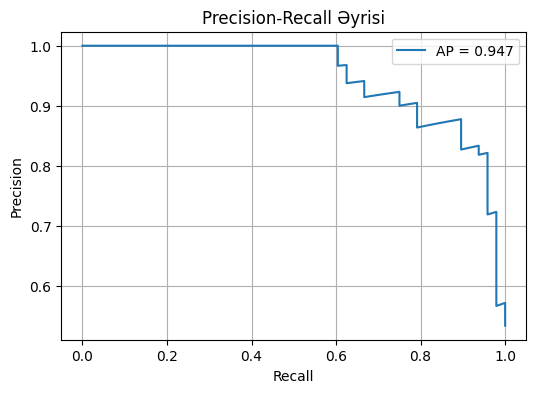

In [ ]:
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals, label=f"AP = {ap_score:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Əyrisi")
plt.grid(True)
plt.legend()
plt.show()

## 🔚 Müqayisə Cədvəli

| Metrik        | İzahı                        | Nə zaman istifadə olunur?             |
|---------------|----------------------------------|----------------------------------|
| Accuracy      | Ümumi dəqiqlik                   | Siniflər balanslıdırsa              |
| Precision     | Pozitiv proqnoz dəqiqliyi         | Yanlış pozitivlər kritikdirsə (FP) |
| Recall        | Həqiqi pozitivləri tapma         | Yanlış neqativlər kritikdirsə (FN) |
| F1-Score      | Precision + Recall balansı       | Balanssız sinif varsa             |
| ROC-AUC       | Təsnifatın müvəffəqiyyəti           | Adətən müqayisə üçün      |
| Log-loss      | Ehtimal keyfiyyəti                | Proqnoz etibarlılığı tələb olunursa|
| PR Curve      | Dəqiqlik vs Geri çağırma əyrisi       | Pozitiv sinif azdırsa üstünlük verilir|

#**📘 5. Model Diaqnostikası (Ətraflı Təhlil)**

Modeli öyrətdik, lakin yetərl olmaya bilər!
Həqiqətən yaxşı işləyirmi?
Bütün dəyişənlər bərabər dərəcədə təsir edirmi?
Hipotezlər təmin olunurmu?

**Model Diaqnostikası** ilə bunları aydınlaşdırmaq mümkündür.

## 📉 5.1. Qalıqların Analizi (Deviance Residuals)

Qalıq (Residual) modelin proqnozlaşdırdığı ehtimal ilə həqiqi sinif arasındakı fərqdir.

Loqistik reqressiyada klassik qalıqlar(RSS) əvəzinə **Deviance Residuals** istifadə olunur.

Deviance (Ümumi Uyğunluq İtkisi) düsturu belədir:

$$ D = -2 \sum_{i=1}^n \left[ y_i \log(\hat{p}_i) + (1 - y_i) \log(1 - \hat{p}_i) \right] $$

Burada:

$$ \hat{p}_i $$

modelin proqnozlaşdırdığı pozitiv sinif ehtimalıdır.

$$ y_i $$

həqiqi sinif (0 və ya 1) dəyəridir.

Deviance Residual düsturu isə:

$$ r_i = \text{sign}(y_i - \hat{p}_i) \cdot \sqrt{ -2 \left[ y_i \log(\hat{p}_i) + (1 - y_i) \log(1 - \hat{p}_i) \right] } $$

### Misal:

Həqiqi nəticə:

$$ y_i = 1 $$

Proqnoz:

$$ \hat{p}_i = 0.9 $$

Bu halda deviance residual:

$$ r_i = +1 \times \sqrt{-2 \times (1 \times \log(0.9) + 0 \times \log(0.1))} = \sqrt{-2 \times (-0.105)} \approx 0.458 $$

Model müşahidəni yaxşı proqnozlaşdırıb (kiçik qalıq).

Optimization terminated successfully.
         Current function value: 0.240485
         Iterations 18


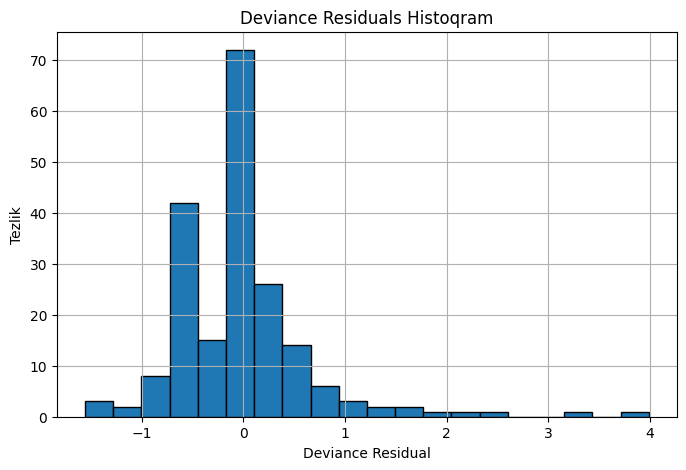

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_samples=200, n_features=5, n_informative=3, random_state=42)
X = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(X.shape[1])])
X_const = sm.add_constant(X)

model = sm.Logit(y, X_const)
result = model.fit()
y_pred = result.predict(X_const)

residuals = np.sign(y - y_pred) * np.sqrt(-2 * (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=20, edgecolor="black")
plt.title("Deviance Residuals Histoqram")
plt.xlabel("Deviance Residual")
plt.ylabel("Tezlik")
plt.grid(True)
plt.show()

## 🧨 5.2. Təsirli Müşahidələr (Influential Observations)

Bəzi müşahidələr modelə həddindən artıq təsir edə bilər. Bunlar adətən kənar dəyərlər, uc nöqtələrdəki müşahidələr və ya yüksək leverage dəyərinə malik nöqtələr olur.

Cook's Distance düsturu:

$$ D_i = \frac{ \sum_{j=1}^n (\hat{y}_j - \hat{y}_{j(i)})^2 }{p \cdot MSE} $$

Burada:

$$ \hat{y}_{j(i)} $$

\( i \) - inci müşahidə olmadan edilən proqnoz,

$$ p $$

parametr sayı,

$$ MSE $$

orta kvadrat xətası.

Qayda:

$$ D_i > \frac{4}{n} $$

olarsa, diqqətlə araşdırılmalıdır


Leverage (Ling) düsturu:

$$ h_i = x_i^T (X^T X)^{-1} x_i $$

Burada:

$$ h_i > \frac{2p}{n} $$

olarsa, yüksək leverage hesab olunur.


### Misal:

 Parametr sayı: $$ p = 5 $$

Müşahidə sayı:

$$ n = 100 $$

Təsirli müşahidə üçün hədd:

$$ D_i > 0.04 $$

Yüksək leverage üçün hədd:

$$ h_i > 0.1 $$

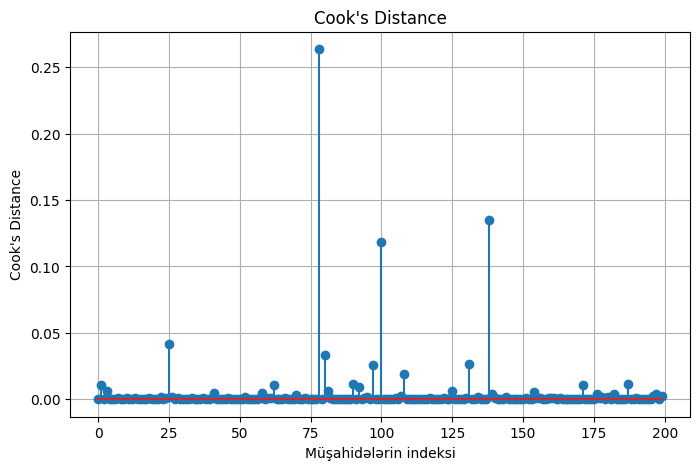

In [ ]:
influence = result.get_influence()
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(8,5))
plt.stem(np.arange(len(cooks_d)), cooks_d)
plt.title("Cook's Distance")
plt.xlabel("Müşahidələrin indeksi")
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()

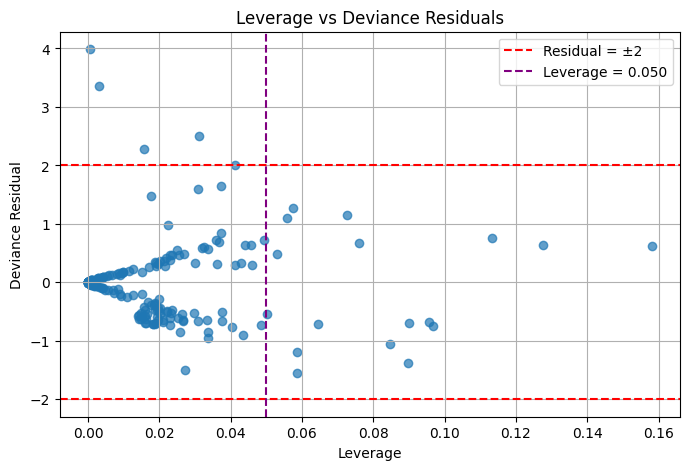

In [ ]:
influence = result.get_influence()
leverage = influence.hat_matrix_diag

n = len(y)
p = X.shape[1]
leverage_threshold = 2 * p / n

plt.figure(figsize=(8, 5))
plt.scatter(leverage, residuals, alpha=0.7)
plt.axhline(y=2, color='red', linestyle='--', label='Residual = ±2')
plt.axhline(y=-2, color='red', linestyle='--')
plt.axvline(x=leverage_threshold, color='purple', linestyle='--', label=f'Leverage = {leverage_threshold:.3f}')

plt.xlabel("Leverage")
plt.ylabel("Deviance Residual")
plt.title("Leverage vs Deviance Residuals")
plt.legend()
plt.grid(True)
plt.show()


## 📊 5.3. Hosmer–Lemeshow Testi (Yaxşı Uyğunluq Testi)

Modelin proqnozlaşdırdığı ehtimallarla həqiqi nəticələr nə qədər uyğundur?

Test statistikası:

$$ C = \sum_{j=1}^g \frac{(O_j - E_j)^2}{E_j (1 - \hat{p}_j)} $$

Burada:

$$ O_j $$

müşahidə olunan (observed) pozitiv hadisə sayı,

$$ E_j $$

gözlənilən (expected) pozitiv hadisə sayı,

$$ \hat{p}_j $$

qrup orta proqnoz ehtimalı,

$$ g $$

qrup sayı (adətən 10).

Nəticə:

\( p > 0.05 \) olarsa, model uyğun hesab olunur ✅

\( p < 0.05 \) olarsa, uyğunluq kifayət deyil ❌

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chi2
import pandas as pd
import numpy as np

df = pd.DataFrame({"y": y, "y_pred": y_pred})
df["quantile"] = pd.qcut(df["y_pred"], 10)

obs = df.groupby("quantile")["y"].sum()
exp = df.groupby("quantile")["y_pred"].sum()
total = df.groupby("quantile")["y"].count()

hl_stat = (((obs - exp) ** 2) / (exp * (1 - exp / total))).sum()
p_value = chi2.sf(hl_stat, df=8)

print("Hosmer-Lemeshow Statistikası:", hl_stat)
print("p-value:", p_value)

Hosmer-Lemeshow Statistikası: 127.91694407839114
p-value: 7.642870493220003e-24


## 🔁 5.4. Çoxlu Xətti Asılılıq (Multicollinearity) – VIF ilə Nəzarət

Müstəqil dəyişənlər arasında yüksək korrelyasiya varsa, əmsallar qeyri-sabit olur və modelin şərh edilməsi pozulur.

VIF (Variance Inflation Factor) düsturu:

$$ VIF_j = \frac{1}{1 - R_j^2} $$

Burada:

$$ R_j^2 $$

\( j \)-inci dəyişənin digər müstəqil dəyişənlərə reqressiyasından alınan R-kvadrat dəyəridir.

Şərh:

- \( VIF < 5 \) → Problem yoxdur
- \( 5 < VIF < 10 \) → Diqqət edilməlidir
- \( VIF > 10 \) → Çoxlu xətti asılılıq var

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = {
    "x1": [1, 2, 3, 4, 5],
    "x2": [5, 3, 6, 2, 1],
}
df = pd.DataFrame(data)

X_const = sm.add_constant(df)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns

vifs = []
for i in range(X_const.shape[1]):
    vif = variance_inflation_factor(X_const.values, i)
    vifs.append(vif)

vif_data["VIF"] = vifs

print(vif_data)

  Feature        VIF
0   const  25.945055
1      x1   1.890110
2      x2   1.890110


##🧪Müqayisə

Nəzarət nöqtələri və mənaları:

| Dəyərlər           | İstifadə Olunan Ölçü/Düstur                  | Mənası / Şərhi                           |
|--------------------------|-----------------------------------------|-----------------------------------------|
| **Deviance Residuals**     | $$ r_i = \text{sign}(y_i - \hat{p}_i) \cdot \sqrt{ -2 \left[ y_i \log(\hat{p}_i) + (1 - y_i) \log(1 - \hat{p}_i) \right] } $$               | Modelin müşahidə əsaslı uyğunluğunu ölçür      |
| **Cook’s Distance**        | $$ D_i = \frac{ \sum (\hat{y} - \hat{y}_{(i)})^2 }{p \cdot MSE} $$ | Müşahidənin modelə təsiri                   |
| **Leverage**               | $$ h_i = x_i^T (X^T X)^{-1} x_i $$     | Müşahidənin outlierinin olub olmadığını göstərir |
| **Hosmer-Lemeshow Testi**  | $$ C = \sum \frac{(O_j - E_j)^2}{E_j (1 - \hat{p}_j)} $$ | Model uyğunluğunun statistik testi       |
| **VIF**                    | $$ VIF_j = \frac{1}{1-R_j^2} $$         | Dəyişənlər arası çoxlu xətti asılılıq  |


#**📘 6.Feature engineering and Preprocessing**

Maşın öyrənməsi modellərində verilənləri birbaşa istifadə etmək adətən kifayət olmur.
Modelin uğurlu olması üçün **verilənlərin düzgün hazırlanması, transformasiyası və uyğun featurelərin yaradılması** lazım gəlir.

## 6.1 Dummy Dəyişənlər (One-Hot Encoding)

- **Nədir?** Kateqorik dəyişənlərin saylı modelə daxil edilməsi üçün ədədi(numeric) formaya salınması.
- Misal: "Rəng" dəyişəni: {Qırmızı, Mavi, Yaşıl}
- Saylı modelə birbaşa daxil edilə bilməyən kateqorik dəyişənləri, hər kateqoriya üçün ayrıca bir sütun (dummy dəyişən) yaradırıq.

### Necə?

Hər kateqoriya üçün 0 və ya 1 dəyərləri alan yeni dəyişənlər yaradılır.

Məsələn:

| Rəng   | Rəng_Qırmızı | Rəng_Mavi | Rəng_Yaşıl |
|--------|--------------|-----------|------------|
| Qırmızı| 1            | 0         | 0          |
| Mavi   | 0            | 1         | 0          |
| Yaşıl  | 0            | 0         | 1          |

### Niyə önəmlidir?

- Modellər saylı dəyərlərlə işləyir, bu çevrilmə modeli qidalandırır.
- Kateqorik dəyişənlər düzgün təmsil olunmazsa, modelin performansı zəif olar.
- **Qeyd:** Dummy dəyişənlərdən biri adətən çıxarılır(drop_first=True) (dummy variable trap qarşısını almaq üçün) — digərləri o dəyişənin təmsilini təmin edir.

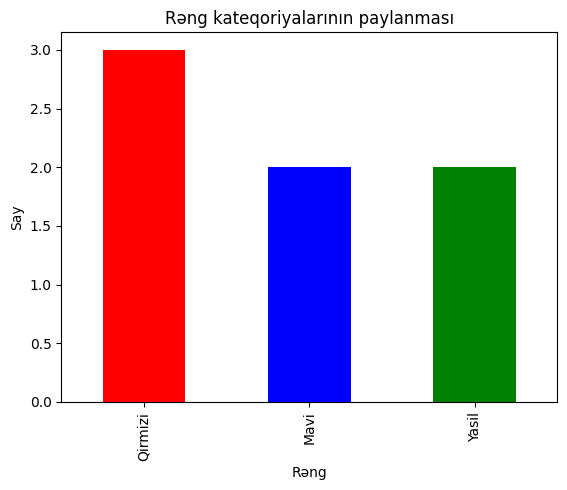

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Reng': ['Qirmizi', 'Mavi', 'Yasil', 'Mavi', 'Qirmizi', 'Yasil', 'Qirmizi']
})

df_dummies = pd.get_dummies(df['Reng'], prefix='Reng')

df_plot = pd.concat([df, df_dummies], axis=1)

counts = df['Reng'].value_counts()

counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Rəng kateqoriyalarının paylanması')
plt.xlabel('Rəng')
plt.ylabel('Say')
plt.show()

## 6.2 Feature Scaling

- **Nədir?** Özəlliklər fərqli miqyaslardadırsa (məsələn, yaş 0-100, gəlir 1000-1000000), model xüsusilə məsafə əsaslı (məsələn, KNN, SVM) və ya qradient əsaslı alqoritmlərdə çətinlik çəkə bilər.
- **Məqsəd:** Bütün özəllikləri ortaq bir miqyasa gətirmək.

### Ən çox istifadə edilən üsullar:

- **Min-Max Scaling:** Özəllik dəyərlərini 0 ilə 1 arasına sıxışdırır.

$$
x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

- **Standardlaşdırma (Z-Score):** Özəlliyin ortalaması 0, standart kənaraçıxması 1 olacaq şəkildə çevirir.

$$
x_{scaled} = \frac{x - \mu}{\sigma}
$$

Burada
$$\mu$$: ortalama,
$$\sigma$$: dispersiya(std).

### Nə vaxt istifadə edilir?

- Məsafəyə əsaslanan modellərdə (KNN, SVM, k-means kimi)
- Xüsusilə fərqli vahidlərə malik özəlliklərdə.

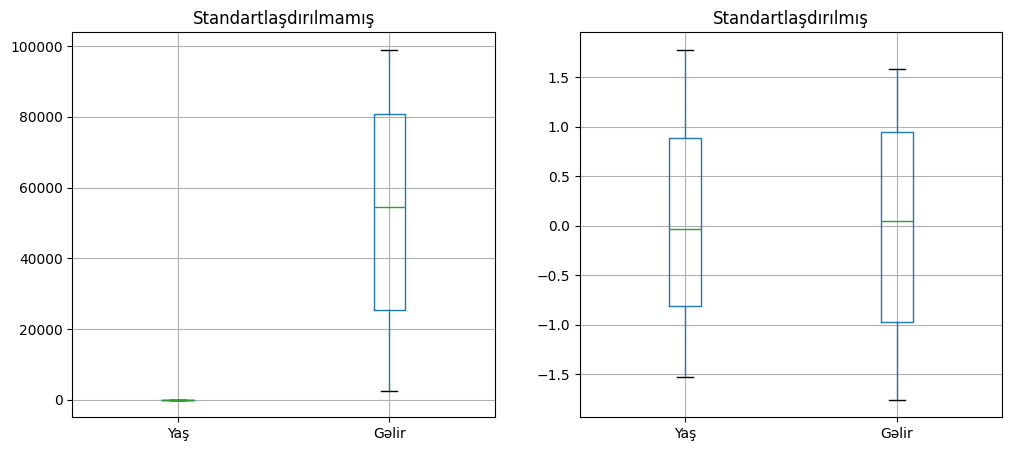

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Misal data
np.random.seed(0)
data = pd.DataFrame({
    'Yaş': np.random.randint(18, 70, 100),
    'Gəlir': np.random.randint(2000, 100000, 100)
})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
data.boxplot()
plt.title('Standartlaşdırılmamış')

plt.subplot(1,2,2)
scaled_df.boxplot()
plt.title('Standartlaşdırılmış')

plt.show()

## 6.3 Outlierlər

- **Nədir?** Verilən setində əksəriyyətdən çox fərqli, kənar nöqtələrdə olan dəyərlər.
- Misal: Bir insanın yaşı 150-dirsə, bu, böyük ehtimalla outlierdir.

### Niyə önəmlidir?

- Modeli yanlış yönləndirə bilər, xüsusilə ortalamaya əsaslanan üsullarda səhvləri böyüdür.
- Modelin ümumi uğuruna və ümumiləşdirməsinə mənfi təsir göstərir.

### Outlierlərin aşkarlanması:

- **Statistik üsullar:** Z-score, IQR (Kvantillər) üsulu
- **Qrafik üsullar:** Boxplot, scatter plot

### Outlierlərə tətbiq olunanlar:

- Silmək (əgər səhvdirsə)
- Transformasiya (loqarifm, kök kimi)
- Winsorizing

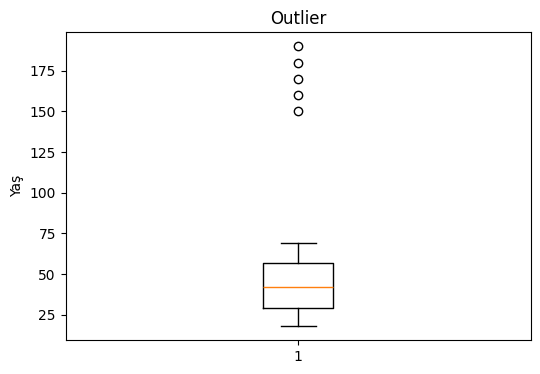

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
data = pd.DataFrame({
    'Yaş': np.append(np.random.randint(18, 70, 95), [150, 160, 170, 180, 190])
})

plt.figure(figsize=(6,4))
plt.boxplot(data['Yaş'])
plt.title('Outlier')
plt.ylabel('Yaş')
plt.show()

## 6.4 Interaction Terms

- **Nədir?** İki və ya daha çox dəyişənin təsirlərinin birləşməsi.
- Misal: Yaş və gəlir tək başına təsirli ola bilər, lakin yaş $\times$ gəlir çarpımı model üçün əhəmiyyətli ola bilər.

### Düstur:

İki dəyişən $$x_1$$ və $$x_2$$ üçün qarşılıqlı təsir şərti:

$$
x_3 = x_1 \times x_2
$$

### Niyə?

- Özəlliklər arasındakı mürəkkəb əlaqələri modelə əlavə edir.
- Modelin dəqiqliyini artıra bilər.

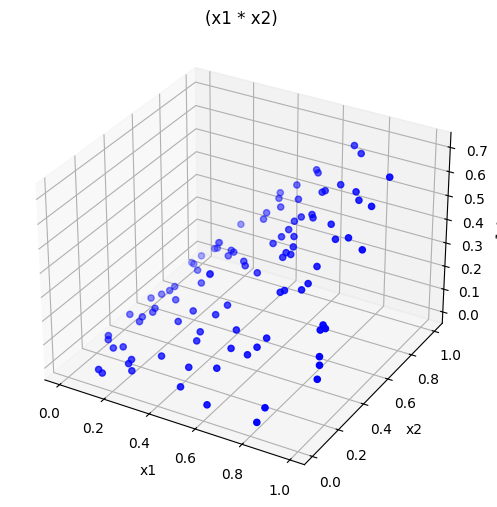

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
x1 = np.random.rand(100)
x2 = np.random.rand(100)
interaction = x1 * x2

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, interaction, c='b', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x1 * x2')
plt.title('(x1 * x2)')
plt.show()

## 6.5 Polynomial Features

- **Nədir?** Mövcud özəlliklərin kvadratı, kubu kimi yüksək dərəcəli şərtlərini yaratmaq.
- Misal: $$x_1^2, x_1^3, x_1 x_2$$

### Məqsəd:

- Modelin qeyri-xətti əlaqələri öyrənməsini təmin edir.
- Xətti modellərdə elastikliyi artırır.

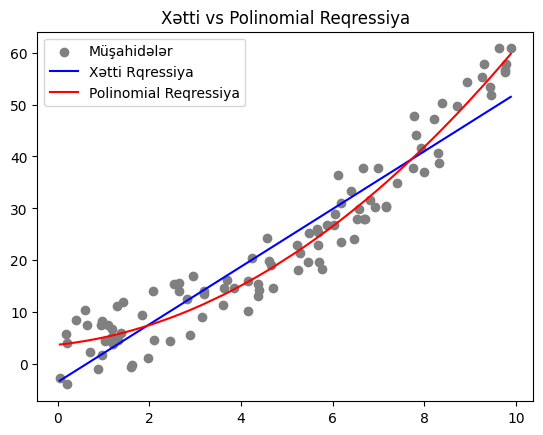

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
X = np.sort(np.random.rand(100) * 10)
y = 0.5 * X**2 + X + 2 + np.random.randn(100) * 4

X = X.reshape(-1,1)
y = y.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_pred_lin = lin_reg.predict(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

plt.scatter(X, y, color='gray', label='Müşahidələr')
plt.plot(X, y_pred_lin, color='blue', label='Xətti Rqressiya')
plt.plot(X, y_pred_poly, color='red', label='Polinomial Reqressiya')
plt.legend()
plt.title('Xətti vs Polinomial Reqressiya')
plt.show()


## 6.6 Rare Label Encoding

- **Nədir?** Kateqorik dəyişənlərdə çox az rast gəlinən siniflər (məsələn, %1-dən az veriləndən təşkil olunmuş) nadir kateqoriya adlandırılır.
- Bu nadir kateqoriyalar modelə daxil edildikdə problem yarada bilər (overfitting, qeyri-sabitlik).

### Həll Üsulları:

- Nadir kateqoriyaları tək bir "Rare" etiketi altında birləşdirmək.
- Bu şəkildə model daha stabil və ümumiləşdirmə gücü daha yüksək olar.

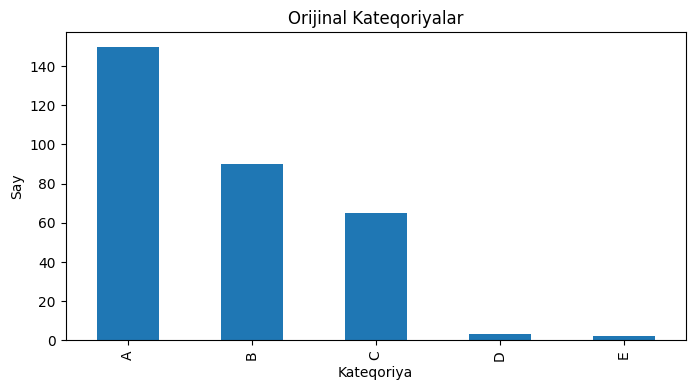

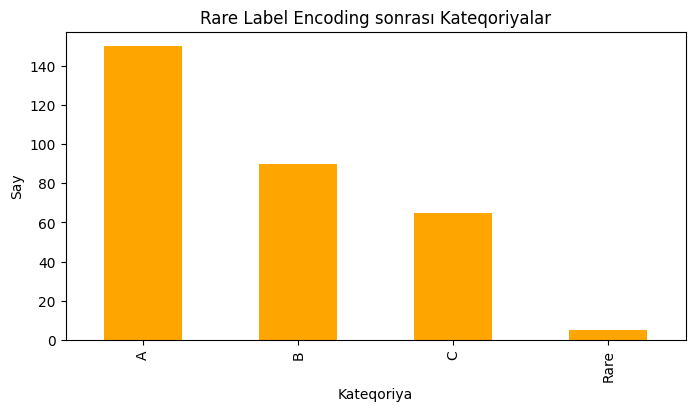

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Kateqoriya': ['A']*150 + ['B']*90 + ['C']*65 + ['D']*3 + ['E']*2
})

counts = data['Kateqoriya'].value_counts()

plt.figure(figsize=(8,4))
counts.plot(kind='bar')
plt.title('Orijinal Kateqoriyalar')
plt.xlabel('Kateqoriya')
plt.ylabel('Say')
plt.show()

# Nadir kateqoriyaları birləşdirək (1%-dən az olanlar)
threshold = len(data) * 0.01
data['Kateqoriya_Rare'] = data['Kateqoriya'].apply(lambda x: x if counts[x] > threshold else 'Rare')

counts_rare = data['Kateqoriya_Rare'].value_counts()

plt.figure(figsize=(8,4))
counts_rare.plot(kind='bar', color='orange')
plt.title('Rare Label Encoding sonrası Kateqoriyalar')
plt.xlabel('Kateqoriya')
plt.ylabel('Say')
plt.show()

# 📘 7. Regularizasiya Metodları

Maşın öyrənməsi və statistikada, xüsusilə reqressiyada, modelin mürəkkəbliyi artdıqca **overfitting** riski yüksəlir.
**Regularizasiya** metodları, modeli sadələşdirib ümumiləşdirmə qabiliyyətini artırmaq üçün istifadə olunur.

## 7.1 L1 Regularizasiya (Lasso)

L1 Reqularizasiya, bəzi əmsalları tam olaraq sıfıra endirərək dəyişən seçimi edir.

$$
L_{lasso}(\beta) = L(\beta) + \lambda \sum_{j=1}^p |\beta_j|
$$

- $$L(\beta)$$: əsas loss funksiyası (məsələn, loqistik reqressiyada neqativ log-likelihood)
- $$\lambda$$: tənzimləmə gücü (hiperparametr)
- $$\beta_j$$: j-inci əmsal

Nəticə:
Bəzi əmsallar sıfırlanır, beləliklə modeldə əhəmiyyətli dəyişənlər seçilmiş olur.

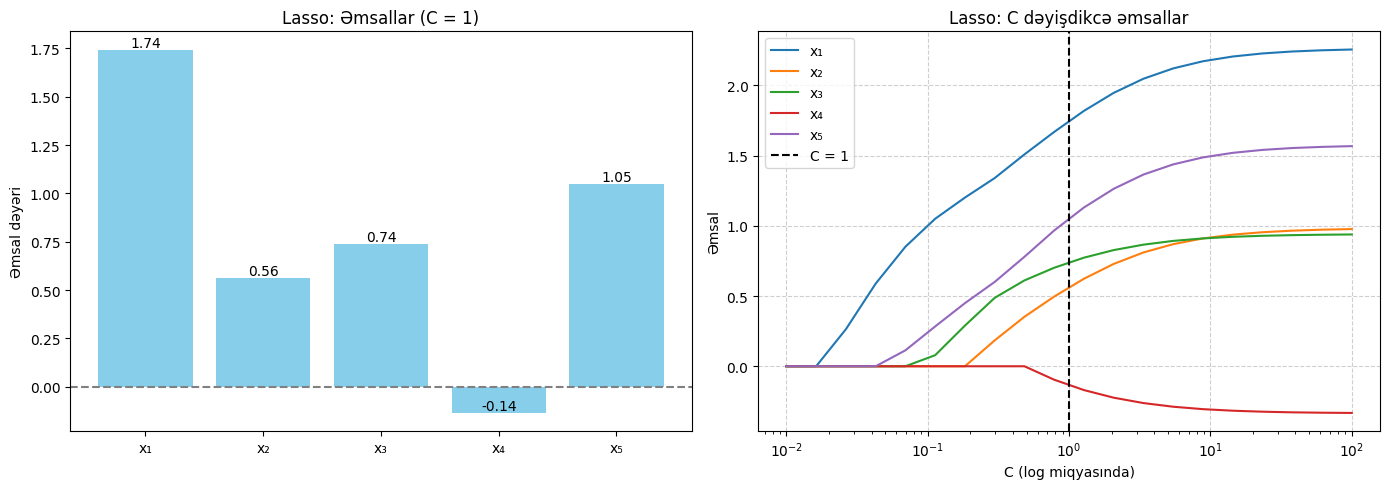

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=0, random_state=42)
feature_names = ['x₁', 'x₂', 'x₃', 'x₄', 'x₅']
C_values = np.logspace(-2, 2, 20)

coefs = []

for C in C_values:
    model = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)
    coefs.append(model.coef_.flatten())

coefs = np.array(coefs)

model_final = LogisticRegression(penalty='l1', solver='liblinear', C=1, max_iter=1000)
model_final.fit(X, y)
final_coefs = model_final.coef_.flatten()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bars = axes[0].bar(feature_names, final_coefs, color='skyblue')
axes[0].set_title("Lasso: Əmsallar (C = 1)")
axes[0].set_ylabel("Əmsal dəyəri")
axes[0].axhline(0, color='gray', linestyle='--')
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

for i in range(coefs.shape[1]):
    axes[1].plot(C_values, coefs[:, i], label=feature_names[i])
axes[1].set_xscale('log')
axes[1].axvline(x=1, color='black', linestyle='--', label='C = 1')
axes[1].set_title("Lasso: C dəyişdikcə əmsallar")
axes[1].set_xlabel("C (log miqyasında)")
axes[1].set_ylabel("Əmsal")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 7.2 L2 Regularizasiya (Ridge)

L2 tənzimləməsi, əmsalların ölçüsünü kiçildir, lakin sıfıra endirmir.

$$
L_{ridge}(\beta) = L(\beta) + \lambda \sum_{j=1}^p \beta_j^2
$$

- $$L(\beta)$$: əsas itki funksiyası
- $$\lambda$$: tənzimləmə gücü
- $$\beta_j$$: j-inci əmsal

Nəticə:
Əmsallar kiçilir, model daha sabit olur.

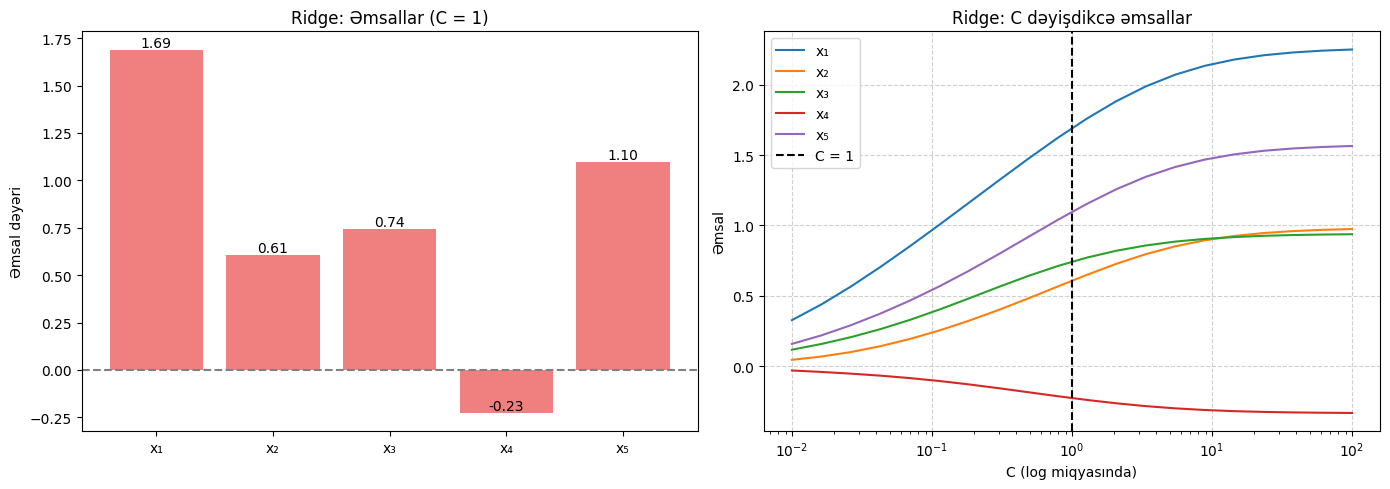

In [ ]:
coefs_ridge = []

for C in C_values:
    model = LogisticRegression(penalty='l2', solver='liblinear', C=C)
    model.fit(X, y)
    coefs_ridge.append(model.coef_.flatten())

coefs_ridge = np.array(coefs_ridge)

model_final_ridge = LogisticRegression(penalty='l2', solver='liblinear', C=1)
model_final_ridge.fit(X, y)
final_coefs_ridge = model_final_ridge.coef_.flatten()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bars = axes[0].bar(feature_names, final_coefs_ridge, color='lightcoral')
axes[0].set_title("Ridge: Əmsallar (C = 1)")
axes[0].set_ylabel("Əmsal dəyəri")
axes[0].axhline(0, color='gray', linestyle='--')
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

for i in range(coefs_ridge.shape[1]):
    axes[1].plot(C_values, coefs_ridge[:, i], label=feature_names[i])
axes[1].set_xscale('log')
axes[1].axvline(x=1, color='black', linestyle='--', label='C = 1')
axes[1].set_title("Ridge: C dəyişdikcə əmsallar")
axes[1].set_xlabel("C (log miqyasında)")
axes[1].set_ylabel("Əmsal")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 7.3 ElasticNet – Lasso + Ridge

L1 və L2 tənzimləmələrinin birləşməsidir.

$$
L_{elasticnet}(\beta) = L(\beta) + \lambda \left[ \alpha \sum_{j=1}^p |\beta_j| + (1 - \alpha) \sum_{j=1}^p \beta_j^2 \right]
$$

- $$\alpha \in [0,1]$$
- $$\alpha = 1$$ → tam Lasso
- $$\alpha = 0$$ → tam Ridge

Nəticə:
Həm dəyişən seçimi, həm də əmsal kiçiltməsi edilir.

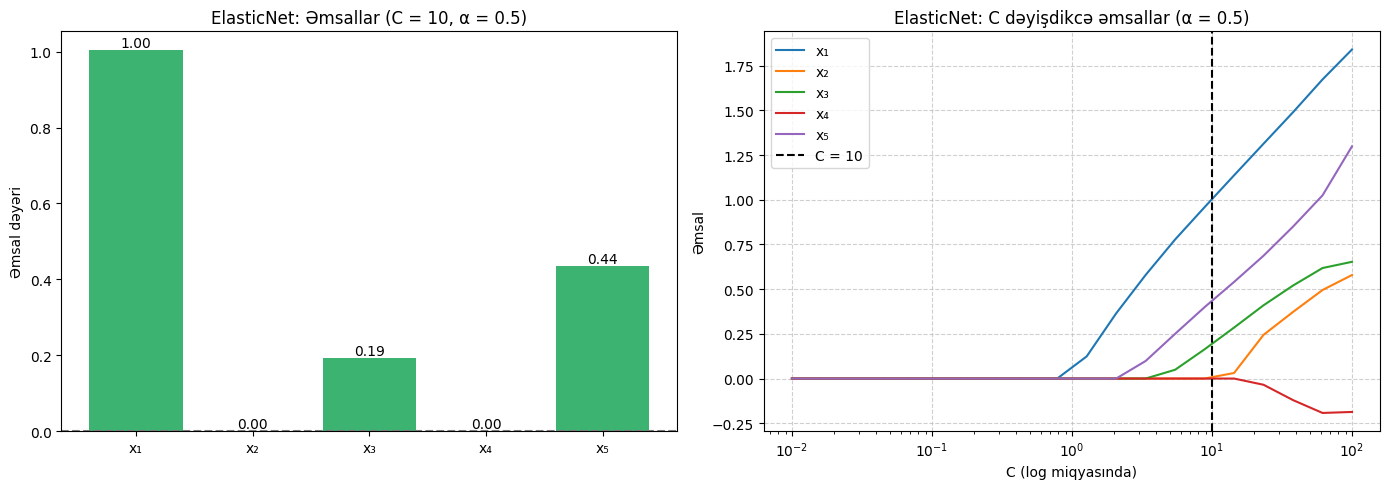

In [ ]:
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    random_state=42
)

feature_names = ['x₁', 'x₂', 'x₃', 'x₄', 'x₅']
C_values = np.logspace(-2, 2, 20)
coefs_en = []

for alpha in 1 / C_values:
    model = SGDClassifier(
        loss='log_loss',
        penalty='elasticnet',
        alpha=alpha,
        l1_ratio=0.5,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    )
    model.fit(X, y)
    coefs_en.append(model.coef_.flatten())

coefs_en = np.array(coefs_en)

alpha_final = 0.1
model_final_en = SGDClassifier(
    loss='log_loss',
    penalty='elasticnet',
    alpha=alpha_final,
    l1_ratio=0.5,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model_final_en.fit(X, y)
final_coefs_en = model_final_en.coef_.flatten()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bars = axes[0].bar(feature_names, final_coefs_en, color='mediumseagreen')
axes[0].set_title("ElasticNet: Əmsallar (C = 10, α = 0.5)")
axes[0].set_ylabel("Əmsal dəyəri")
axes[0].axhline(0, color='gray', linestyle='--')
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

for i in range(coefs_en.shape[1]):
    axes[1].plot(C_values, coefs_en[:, i], label=feature_names[i])
axes[1].set_xscale('log')
axes[1].axvline(x=10, color='black', linestyle='--', label='C = 10')
axes[1].set_title("ElasticNet: C dəyişdikcə əmsallar (α = 0.5)")
axes[1].set_xlabel("C (log miqyasında)")
axes[1].set_ylabel("Əmsal")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 7.4 C Parametri (Regularizasiyanın Tərsi)

Loqistik reqressiyada tənzimləmə gücünü idarə edir.

$$
C = \frac{1}{\lambda}
$$

- Kiçik $$C$$ → güclü tənzimləmə (daha çox kiçiltmə)
- Böyük $$C$$ → zəif tənzimləmə (daha az kiçiltmə)

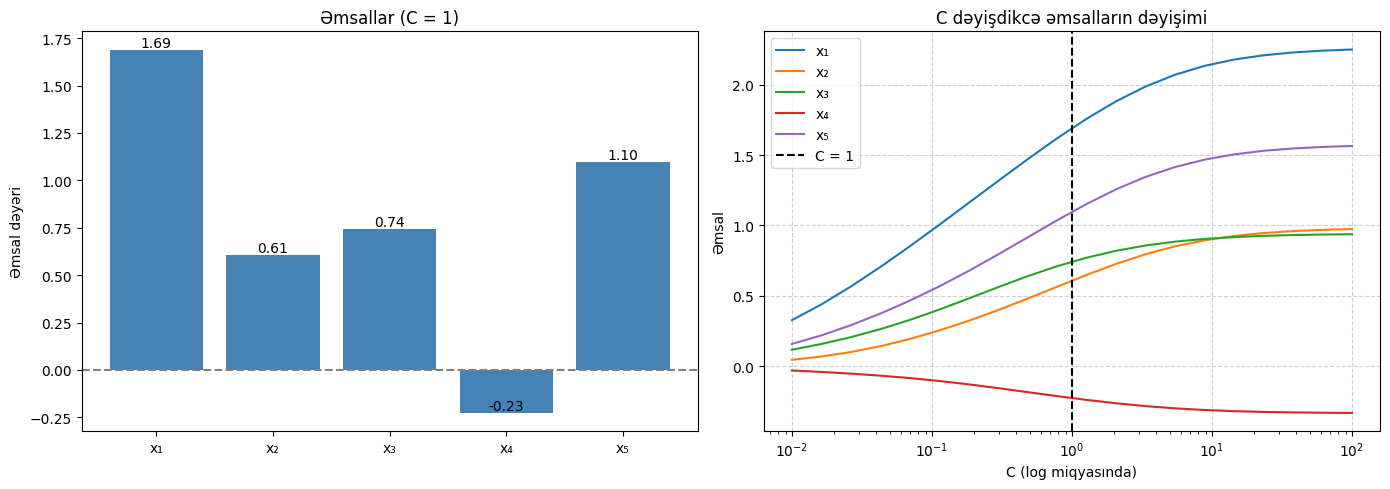

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Dataset
X, y = make_classification(
    n_samples=100,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    random_state=42
)

feature_names = ['x₁', 'x₂', 'x₃', 'x₄', 'x₅']
C_values = np.logspace(-2, 2, 20)
coefs_c = []

for C in C_values:
    model = LogisticRegression(penalty='l2', solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)
    coefs_c.append(model.coef_.flatten())

coefs_c = np.array(coefs_c)

# Final model (C = 1)
model_final = LogisticRegression(penalty='l2', solver='liblinear', C=1, max_iter=1000)
model_final.fit(X, y)
final_coefs = model_final.coef_.flatten()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Bar plot
bars = axes[0].bar(feature_names, final_coefs, color='steelblue')
axes[0].set_title("Əmsallar (C = 1)")
axes[0].set_ylabel("Əmsal dəyəri")
axes[0].axhline(0, color='gray', linestyle='--')
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Right: Coefficient path vs. C
for i in range(coefs_c.shape[1]):
    axes[1].plot(C_values, coefs_c[:, i], label=feature_names[i])
axes[1].set_xscale('log')
axes[1].axvline(x=1, color='black', linestyle='--', label='C = 1')
axes[1].set_title("C dəyişdikcə əmsalların dəyişimi")
axes[1].set_xlabel("C (log miqyasında)")
axes[1].set_ylabel("Əmsal")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#**📘8. Tətbiq (Python)**



## 8.1 Scikit-learn ilə Loqistik Reqressiya ⚙️

Təsəvvür edin ki, əlinizdə bir e-ticarət saytı var və müştərilərin bir məhsulu alıb-almayacağını təxmin etmək istəyirik. Əlimizdəki verilənlərdə müştərilərin yaşı, alış-veriş keçmişi, saytda keçirdiyi vaxt kimi məlumatlar var. Məhz burada **Scikit-learn** köməyə gəlir.

Scikit-learn ilə əlimizdəki verilənlər üzərindən bir model qurub bu müştərinin məhsulu alıb-almayacağını təxmin edə bilərik. Məsələn, belə düşünün:

- Müştəri A: 30 yaşında, saytda 5 dəqiqə keçirib, əvvəlki alış-verişləri var.
- Modelimiz bu məlumatları istifadə edərək, məhsulu alma ehtimalını hesablayır və “Bəli, alacaq” və ya “Xeyr, almayacaq” deyə qərar verir.

Bu prosesdə model öyrədilərkən `fit` funksiyasından istifadə edilir, beləliklə model veriləndəki örnəkləri öyrənir. Sonra `predict` ilə yeni müştərilər üçün təxminlər edirik.

Scikit-learn, təxminləri asanlıqla verməklə yanaşı, eyni zamanda modeli qiymətləndirmək üçün dəqiqlik (accuracy), kəskinlik (precision), həssaslıq (recall) kimi göstəricilər də təqdim edir. Beləliklə modelin nə qədər yaxşı işlədiyini görə bilərik.

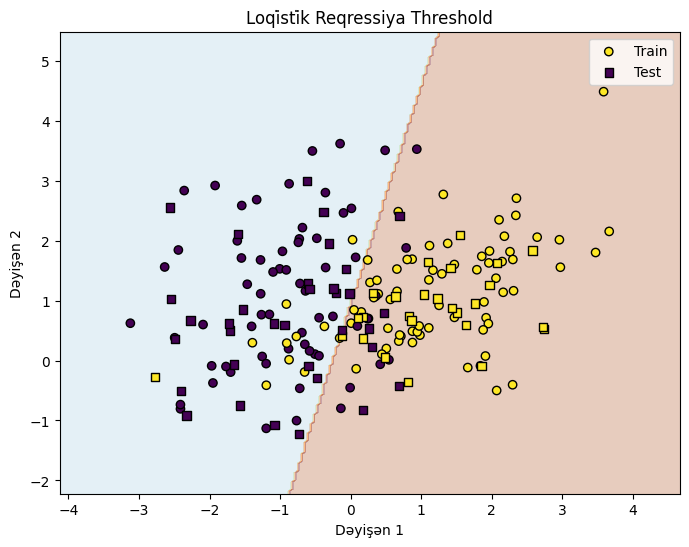

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', label='Test')

plt.title("Loqi̇sti̇k Reqressiya Threshold")
plt.xlabel("Dəyişən 1")
plt.ylabel("Dəyişən 2")
plt.legend()
plt.show()


## 8.2 Statsmodels ilə Loqistik Reqressiya 📊

Daha dərindən və detallı statistikaları görmək istədiyimiz vaxt, **Statsmodels** işinizə yarayır.

Deyək ki, məhsul satın alma ehtimalını sadəcə təxmin etmək deyil, hansı xüsusiyyətlərin bu qərara nə qədər təsir etdiyini də anlamaq istəyirsiniz. Statsmodels bunu təmin edir.

Məsələn, yaşın modeldəki təsiri nə qədərdir? Sayta ziyarət müddəti həqiqətən vacibdirmi? Əmsalların əhəmiyyətliliyi (p-dəyərləri) burada qarşımıza çıxır.

Statsmodelsin köməyi ilə modelinizi `fit` etdikdən sonra detallı bir report hazırlamaq mümkündür:

- Hər bir dəyişənin əmsalı (məsələn yaşın əmsalı 0.05 ola bilər),
- Bu əmsalın standart xətası,
- P-dəyəri: Bu əmsalın həqiqətən təsirli olub-olmadığını göstərir (kiçikdirsə təsirli, böyükdirsə təsirsiz).

Bu sayədə sadəcə təxmin etməklə kifayətlənmirik, modelin daxili məntiqini də başa düşmək mümkündür.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)

n_samples = 500

age = np.random.randint(18, 70, n_samples)
visit_duration = np.random.randint(1, 15, n_samples)
previous_purchases = np.random.randint(0, 10, n_samples)
income = np.random.randint(20000, 150000, n_samples)
clicked_ad = np.random.randint(0, 2, n_samples)

coef = np.array([0.03, 0.1, 0.2, 0.00002, 0.5])
intercept = -5

X = np.column_stack((age, visit_duration, previous_purchases, income, clicked_ad))

linear_combination = np.dot(X, coef) + intercept

prob = 1 / (1 + np.exp(-linear_combination))

y = (prob > 0.5).astype(int)

df = pd.DataFrame({
    'age': age,
    'visit_duration': visit_duration,
    'previous_purchases': previous_purchases,
    'income': income,
    'clicked_ad': clicked_ad,
    'purchased': y
})

X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'visit_duration', 'previous_purchases', 'income', 'clicked_ad']],
    df['purchased'],
    test_size=0.2,
    random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[53  2]
 [ 2 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.96      0.96      0.96        45

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



## 8.3 Model Öyrədilməsi, Təxmin və Qiymətləndirmə 🎯

Bir digər vacib addım modelimizi **öyrətmək** və sonra **yoxlamaq**dır.

Deyək ki, əlimizdə 1000 müştəri veriləni var. Bu verilənin 800-ünü modeli öyrətmək üçün istifadə edirik, qalan 200-ünü isə modeli test etmək üçün ayırırıq. Model test verilənindəki müştərilərin satın alma vəziyyətini təxmin edir.

Burada baxacağımız bir neçə əsas məqam var:

- **Dəqiqlik (Accuracy):** Modelin doğru təxmin etdiyi nümunələrin nisbəti. Məsələn, 200 test müştərisindən 160-nı doğru təxmin edərsə, dəqiqlik %80 olar.
- **Kəskinlik (Precision) və Həssaslıq (Recall):** Məsələn, model satın alacaq dediyində nə qədər doğrudur, satın alacaqları nə qədər qaçırmır deyə baxırıq.
- **F1-Skor (F1-Score):** Kəskinlik (Precision) ilə Həssaslığın (Recall) balanslı ortalaması, xüsusilə balanssız verilən setlərində vacibdir.
- **ROC AUC:** Modelin pozitiv və neqativləri ayırd etmə gücü.

Burada vacib məqam, yüksək dəqiqliyin hər zaman yaxşı model demək olmamasıdır. Məsələn, satın alan müştərilər azdırsa (məsələn %5), model hər kəsin satın almadığını təxmin edərək belə %95 dəqiqlik əldə edə bilər! Buna görə də digər göstəricilərə baxmaq şərtdir.

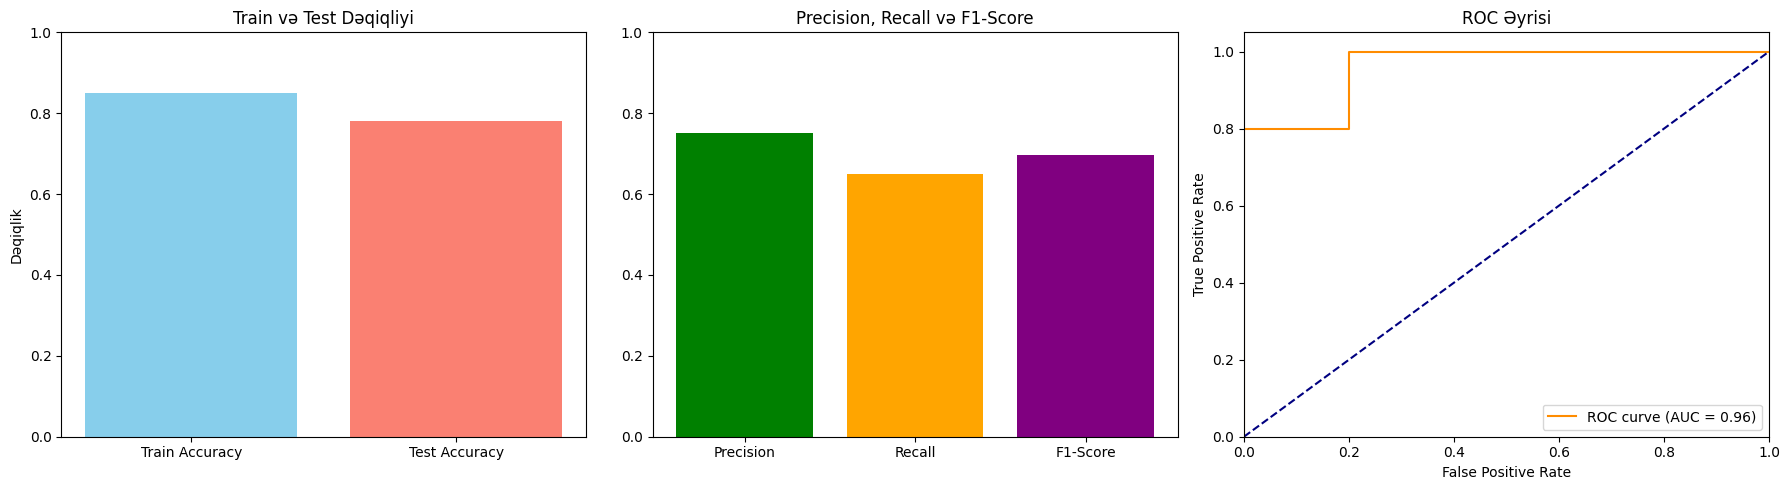

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Örnek değerler
train_acc = 0.85
test_acc = 0.78

precision = 0.75
recall = 0.65
f1_score = 2 * (precision * recall) / (precision + recall)

y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.75, 0.3, 0.9, 0.85, 0.05])

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1) Eğitim & Test Doğruluğu
axs[0].bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['skyblue', 'salmon'])
axs[0].set_ylim(0, 1)
axs[0].set_title('Train və Test Dəqiqliyi')
axs[0].set_ylabel('Dəqiqlik')

# 2) Precision, Recall, F1-Score
axs[1].bar(['Precision', 'Recall', 'F1-Score'], [precision, recall, f1_score], color=['green', 'orange', 'purple'])
axs[1].set_ylim(0, 1)
axs[1].set_title('Precision, Recall və F1-Score')

# 3) ROC Eğrisi
axs[2].plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[2].set_xlim([0, 1])
axs[2].set_ylim([0, 1.05])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('ROC Əyrisi')
axs[2].legend(loc="lower right")

plt.tight_layout()
plt.show()

## 8.4 ROC və Qarışıqlıq Matrisi Vizualizasiyaları 📈

Modeli sadəcə rəqəmlərlə deyil, vizual olaraq da analiz etmək çox faydalıdır.

Məsələn:

- **Qarışıqlıq Matrisi (Confusion Matrix):**\
Burada 4 xana var:

  - **Həqiqi Pozitiv (True Positive):** Modelin “satın alacaq” dediyi və həqiqətən alan müştəri sayı.
  - **Yanlış Pozitiv (False Positive):** Model “satın alacaq” dediyi amma almayanlar.
  - **Həqiqi Neqativ (True Negative):** Model “almayacaq” dediyi və almayanlar.
  - **Yanlış Neqativ (False Negative):** Model “almayacaq” dediyi amma alanlar.

Bu matrislə modelin hansı növ səhvləri daha çox etdiyini görə bilərsiniz.

- **ROC Əyrisi:**\
Modelin müxtəlif qərar həddləri üçün (məsələn satın alma ehtimalı 0.5 əvəzinə 0.3 kimi) necə performans göstərdiyini göstərir. Əyri altındakı sahə (AUC) nə qədər böyükdürsə, model o qədər yaxşıdır.

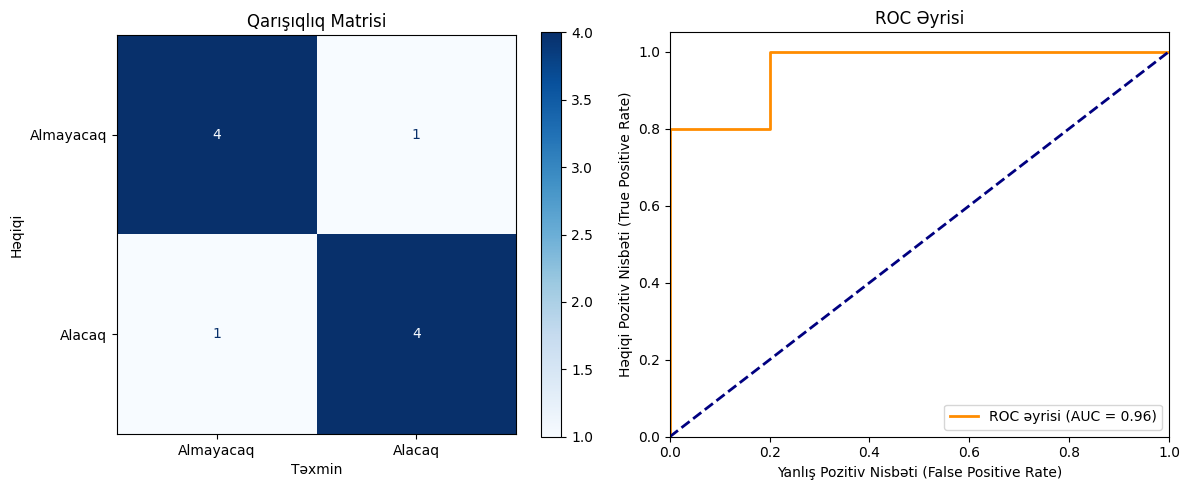

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
y_pred = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])
y_scores = np.array([0.1, 0.6, 0.7, 0.9, 0.2, 0.4, 0.3, 0.85, 0.95, 0.05])

cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Almayacaq", "Alacaq"])

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

cmd.plot(ax=axs[0], cmap=plt.cm.Blues)
axs[0].set_title("Qarışıqlıq Matrisi")
axs[0].set_xlabel("Təxmin")
axs[0].set_ylabel("Həqiqi")

axs[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC əyrisi (AUC = {roc_auc:.2f})')
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Yanlış Pozitiv Nisbəti (False Positive Rate)')
axs[1].set_ylabel('Həqiqi Pozitiv Nisbəti (True Positive Rate)')
axs[1].set_title('ROC Əyrisi')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

## 8.5 GridSearchCV ilə Model Optimizasiyası 🔍

Son olaraq, modelinizi daha yaxşı hala gətirmək üçün hiperparametr tənzimləmələri etmək lazım gələ bilər.

Loqistik reqressiyada məsələn **C parametri** (reqularizasiya gücü) modelin nə qədər çevik və ya sərt olacağını müəyyən edir.

- Kiçik C  → model verilənə çox uyğunlaşır, həddən artıq öyrənmə (overfitting) riski var.
- Böyük C → model həddən artıq məhdudlaşdırılır, az öyrənmə (underfitting) baş verir.

GridSearchCV ilə müxtəlif C dəyərlərini və digər parametrləri avtomatik olaraq sınaqdan keçirib, ən yaxşı nəticə verən tənzimləməni tapa bilərsiniz. Həmçinin bu proses zamanı veriləni k-fold çarpaz doğrulama (cross-validation) ilə bir neçə hissəyə bölüb test edərək, modelin ümumi uğurunu etibarlı şəkildə ölçür.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear')

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print("Ən yaxşı C dəyəri:", grid.best_params_['C'])
print("Ən yaxşı CV dəqiqliyi:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test dəqiqliyi:", accuracy_score(y_test, y_pred))

Ən yaxşı C dəyəri: 0.01
Ən yaxşı CV dəqiqliyi: 0.8612500000000001
Test dəqiqliyi: 0.865


#**📘9. Tez-tez Edilən Səhvlər**

## 9.1 Sinif Balanssızlığının (Class Imbalance) Göz Ardı Edilməsi ⚖️

**Nədir?**

Siniflər arasında çox böyük fərqlər olduqda, məsələn, bir sinif çoxlu sayda nümunəyə sahibkən digər sinif çox az nümunəyə sahibdirsə, model adətən çoxluq sinfinə fokuslanır.

**Nümunə:**

Bir fırıldaqçılıq aşkarlama modelində fırıldaqçılıq halları %1, normal əməliyyatlar %99 isə model əksər vaxt “bu əməliyyat fırıldaqçılıq deyil” deyə təxmin edərək %99 dəqiqlik əldə edir. Amma əslində fırıldaqçılıq hallarını aşkar etmək əsas məqsəddir.

**Niyə problemdir?**

Yüksək dəqiqlik yanıldıcı olur, çünki nümunəyə az olan sinifindəki vacib hallar qaçırılır. Buna görə də **precision, recall və F1-score** kimi göstəricilərə baxmaq lazımdır.

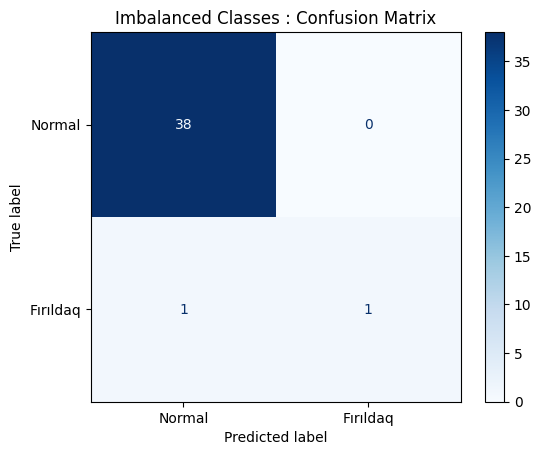

🔎 Classification Report:
              precision    recall  f1-score   support

           0      0.974     1.000     0.987        38
           1      1.000     0.500     0.667         2

    accuracy                          0.975        40
   macro avg      0.987     0.750     0.827        40
weighted avg      0.976     0.975     0.971        40



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

np.random.seed(42)
n = 200

X_0 = np.random.normal(loc=0, scale=1, size=(190, 2))
X_1 = np.random.normal(loc=2, scale=1, size=(10, 2))

X = np.vstack((X_0, X_1))
y = np.array([0]*190 + [1]*10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fırıldaq'])
disp.plot(cmap='Blues')
plt.title('Imbalanced Classes : Confusion Matrix')
plt.show()

print("🔎 Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

## 9.2 Xətti Olmayan Əlaqələrdə Modelin Çətinlik Çəkməsi

**Nədir?**

Loqistik reqressiya xətti bir modeldir; müstəqil dəyişənlərin hədəflə xətti bir əlaqəsi olduğunu fərz edir.

**Nümunə:**

Bir müştəri məmnuniyyəti balı ilə satın alma ehtimalı arasında xətti olmayan (məsələn U şəkilli) əlaqə varsa, loqistik reqressiya bu əlaqəni tam anlaya bilməz.

**Niyə problemdir?**

Model səhv təxminlər edir, çünki əlaqə xətti deyil. Bu halda **polinom terminlər əlavə etmək**, **transformasiyalar aparmaq** ya da **başqa modellər** (məsələn decision tree) istifadə etmək daha yaxşı olar.

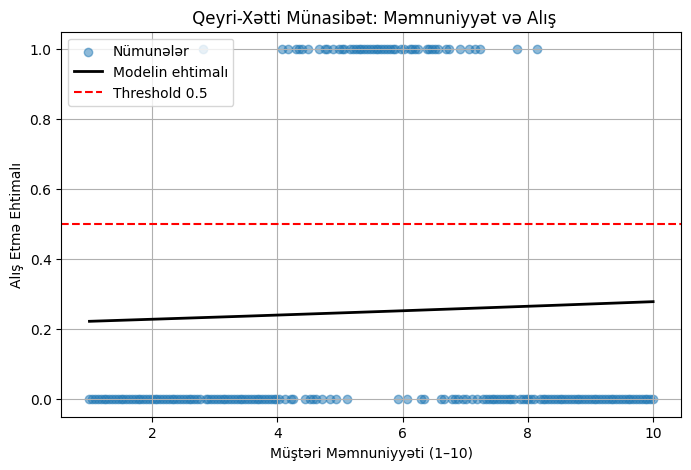

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Süni müştəri məmnuniyyəti dataları
np.random.seed(1)
n = 200
memnuniyyet = np.linspace(1, 10, n)

# Qeyri-xətti ehtimal funksiyası: ortada yüksək
prob = np.exp(-0.5 * (memnuniyyet - 5.5)**2)
prob = prob / prob.max()  # 0–1 arası normallaşdır

# Sinif etiketləri (P-yə görə binomial)
y = np.random.binomial(1, prob)

# Model qur
X = memnuniyyet.reshape(-1, 1)
model = LogisticRegression()
model.fit(X, y)
probs = model.predict_proba(X)[:, 1]

# Vizual
plt.figure(figsize=(8,5))
plt.scatter(memnuniyyet, y, alpha=0.5, label='Nümunələr')
plt.plot(memnuniyyet, probs, color='black', linewidth=2, label='Modelin ehtimalı')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold 0.5')
plt.xlabel("Müştəri Məmnuniyyəti (1–10)")
plt.ylabel("Alış Etmə Ehtimalı")
plt.title(" Qeyri-Xətti Münasibət: Məmnuniyyət və Alış")
plt.legend()
plt.grid(True)
plt.show()

## 9.3 Dəyişən Tələsi (Dummy Variable Trap) 🚫

**Nədir?**

Kateqorik dəyişənləri modelə daxil edərkən, bütün kateqoriyaları dəyişən kimi istifadə etmək müstəqil dəyişənlər arasında mükəmməl çoxlu xətti asılılıq (multicollinearity) yaradır.

**Nümunə:**

Üç fərqli şəhər üçün "Bakı”, “Gəncə və “Sumqayıt" adlı  dəyişənlər yaradıb hamısını modelə əlavə etsəniz, biri digərlərinin xətti kombinasiyası olar.

**Niyə problemdir?**

Bu vəziyyət reqressiya əmsallarının mənasını poza bilər və modelin stabil işləməsini əngəlləyər. Həll olaraq bir kateqoriyanı əsas götürüb onu dəyişənlərdən çıxarmaq lazımdır.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

data = {
    'Yas': [25, 32, 40, 28, 45, 35, 38, 30, 29, 50],
    'Maas': [5000, 6000, 8000, 5200, 9000, 6200, 7500, 5800, 5700, 8500],
    'Seher': ['Bakı', 'Gəncə', 'Sumqayıt', 'Bakı', 'Gəncə', 'Sumqayıt', 'Bakı', 'Gəncə', 'Sumqayıt', 'Bakı'],
    'Ayrildi': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
df_dummies = pd.get_dummies(df, columns=['Seher'], drop_first=True)

X = df_dummies.drop(columns=['Ayrildi'])
y = df_dummies['Ayrildi']

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

print(f"Model score: {model.score(X, y):.2f}")

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coef_df)

Model score: 0.90
          Feature  Coefficient
0             Yas    -0.371560
1            Maas     0.001732
2     Seher_Gəncə    -0.975841
3  Seher_Sumqayıt     0.872549


## 9.4 Həddən Artıq Öyrənmə (Overfitting) — Xüsusilə Kiçik Dataset ilə ⚠️

**Nədir?**

Model `train` setinə həddən artıq uyğunlaşır və verilən daxilindəki səs-küyü(noise) öyrənir. Nəticədə yeni verilənlərə ümumiləşdirmə edə bilmir.

**Nümunə:**

Yalnız 50 nümunədən ibarət kiçik bir datasetlə çox mürəkkəb bir model `train` edilsə, `train` dəqiqliyi çox yüksək olar, amma `test`də performansı düşər.

**Niyə problemdir?**

Real həyatda model yaxşı işləməz, sadəcə `train` setini “əzbərləmiş” olar. Bu səbəbdən daha sadə modellər seçmək, verilən miqdarını artırmaq və ya **reqularizasiya** tətbiq etmək vacibdir.

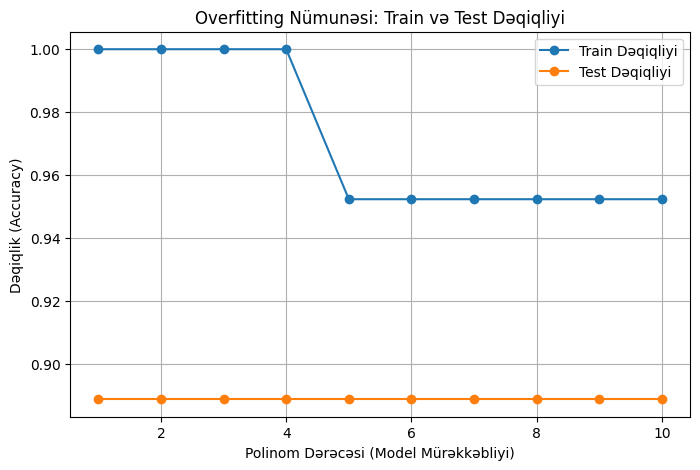

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(0)
X = np.linspace(-3, 3, 30).reshape(-1,1)
y = (X.ravel() > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_scores = []
test_scores = []
degrees = range(1, 11)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.plot(degrees, train_scores, label='Train Dəqiqliyi', marker='o')
plt.plot(degrees, test_scores, label='Test Dəqiqliyi', marker='o')
plt.xlabel('Polinom Dərəcəsi (Model Mürəkkəbliyi)')
plt.ylabel('Dəqiqlik (Accuracy)')
plt.title('Overfitting Nümunəsi: Train və Test Dəqiqliyi')
plt.legend()
plt.grid(True)
plt.show()


#**📘 10. Real Həyatda İstifadə Sahələri**

## 10.1 Tibb: Xəstəlik Proqnozu 🏥

Tibb sahəsində, xəstələrin müəyyən bir xəstəliyə sahib olub-olmadığını və ya xəstəliyin inkişaf edib-etməyəcəyini proqnozlaşdırmaq çox vacibdir.

- **Məqsəd:** Xəstənin simptomları, test nəticələri və demoqrafik məlumatları (yaş, cins və s.) istifadə edərək xəstəlik ehtimalını hesablamaq.
- **Nümunə:** Diabet riski proqnozu üçün; xəstənin çəki, yaş, qan şəkəri kimi məlumatları modelə daxil edilir və model “diabet var” ya da “yox” nəticəsini verir.
- **Niyə loqistik reqressiya?** Çünki nəticə iki siniflidir (xəstə/xəstə deyil) və ehtimal proqnozuna əsaslanır.
- Bu proqnozlar, erkən diaqnoz, qabaqlayıcı tədbirlər və müalicə planlaması üçün istifadə olunur.

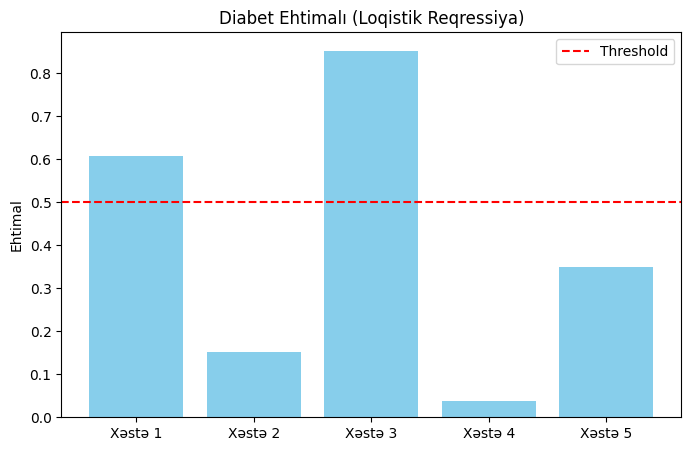

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

data = {
    'Yas': [45, 34, 50, 23, 40],
    'Ceki': [85, 70, 90, 60, 80],
    'Qan_Sekeri': [130, 100, 160, 85, 110],
    'Diabet': [1, 0, 1, 0, 0]
}

df = pd.DataFrame(data)

X = df[['Yas', 'Ceki', 'Qan_Sekeri']]
y = df['Diabet']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

y_prob = model.predict_proba(X_scaled)[:,1]

plt.figure(figsize=(8,5))
plt.bar(range(len(y_prob)), y_prob, color='skyblue')
plt.xticks(range(len(y_prob)), ['Xəstə 1', 'Xəstə 2', 'Xəstə 3', 'Xəstə 4', 'Xəstə 5'])
plt.axhline(0.5, color='red', linestyle='--', label='Threshold')
plt.title('Diabet Ehtimalı (Loqistik Reqressiya)')
plt.ylabel('Ehtimal')
plt.legend()
plt.show()

## 10.2 Marketinq

Marketinq sektorunda müştərilərin bir məhsulu alma ehtimalını proqnozlaşdırmaq vacib bir tapşırıqdır.

- **Məqsəd:** Müştərilərin demoqrafik məlumatları, əvvəlki satınalma davranışları və saytdakı fəaliyyətlərinə əsasən satınalma edib-etməyəcəyini proqnozlaşdırmaq.
- **Nümunə:** Bir e-ticarət saytında müştərinin yaşı, cinsi, əvvəlki alışları və veb saytı üzərindəki qarşılıqlı əlaqələri modelə daxil edilir; model “satın alacaq” ya da “satın almayacaq” nəticəsini verir.
- Bu proqnozlar kampaniya planlaması, hədəfli reklamlar və müştəri seqmentasiyası üçün istifadə olunur.

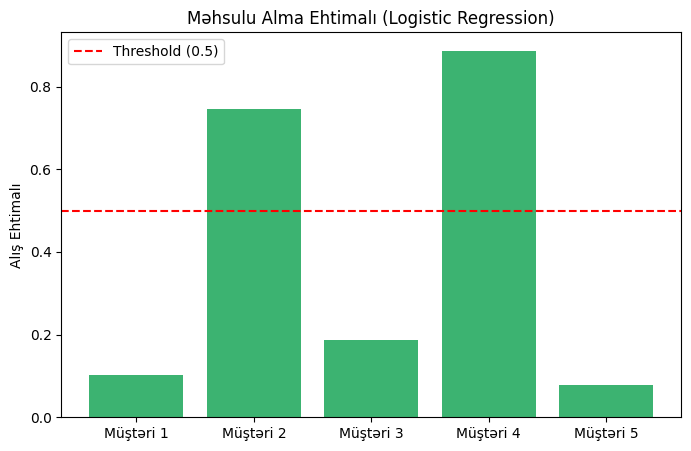

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

data = {
    'Yas': [25, 40, 35, 50, 23],
    'Saytda_Kechelən_Vaxt': [5, 15, 7, 20, 3],
    'Evvelki_Alis': [0, 1, 0, 1, 0],
    'Alis': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

X = df[['Yas', 'Saytda_Kechelən_Vaxt', 'Evvelki_Alis']]
y = df['Alis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

y_prob = model.predict_proba(X_scaled)[:,1]

plt.figure(figsize=(8,5))
plt.bar(range(len(y_prob)), y_prob, color='mediumseagreen')
plt.xticks(range(len(y_prob)), [f'Müştəri {i+1}' for i in range(len(y_prob))])
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.title('Məhsulu Alma Ehtimalı (Logistic Regression)')
plt.ylabel('Alış Ehtimalı')
plt.legend()
plt.show()

## 10.3 Maliyyə: Kreditin Geri Ödənilməsi Riski 💰

Maliyyə sektorunda, xüsusilə kredit verən qurumlar üçün, müştərilərin kreditlərini geri ödəmə ehtimalını proqnozlaşdırmaq kritik bir elementdir.

- **Məqsəd:** Kredit üçün müraciət edən şəxsin gəlir vəziyyəti, kredit keçmişi, mövcud borc vəziyyəti kimi məlumatlar istifadə edilərək kreditin geri ödənilməməsi riski proqnozu.
- **Nümunə:** Model bu məlumatlara əsaslanaraq “geri ödəyəcək” və ya “ödəyə bilməyəcək” şəklində nəticə verir.
- Bu məlumat bankların risk idarəçiliyini yaxşılaşdırır.

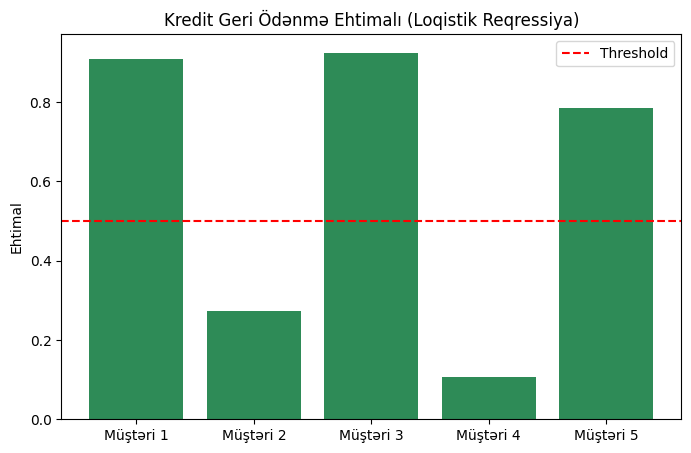

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

data = {
    'Gelir': [3.5, 2.0, 4.0, 1.8, 3.2],
    'Odenis_Sayi': [12, 5, 10, 3, 9],
    'Cari_Borc': [1.0, 3.0, 0.5, 4.5, 1.5],
    'Kredit_Geri_Odenis': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

X = df[['Gelir', 'Odenis_Sayi', 'Cari_Borc']]
y = df['Kredit_Geri_Odenis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

y_prob = model.predict_proba(X_scaled)[:, 1]

plt.figure(figsize=(8, 5))
plt.bar(range(len(y_prob)), y_prob, color='seagreen')
plt.xticks(range(len(y_prob)), [f'Müştəri {i+1}' for i in range(len(y_prob))])
plt.axhline(0.5, color='red', linestyle='--', label='Threshold')
plt.title('Kredit Geri Ödənmə Ehtimalı (Loqistik Reqressiya)')
plt.ylabel('Ehtimal')
plt.legend()
plt.show()

## 10.4 İnsan Resursları: İşçinin Ayrılma Proqnozu 👥

İnsan resursları sahəsində, işçilərin işdən ayrılma (turnover) riskini proqnozlaşdırmaq şirkətlər üçün böyük əhəmiyyət daşıyır.

- **Məqsəd:** İşçilərin işdən ayrılıb-ayrılmayacağını proqnozlaşdırmaq; beləliklə proaktiv tədbirlər görülə bilər.
- **Nümunə:** İşçinin yaşı, maaşı, iş müddəti, məmnuniyyət sorğuları kimi məlumatlar modelə daxil edilir və model “qalacaq” ya da “ayrılacaq” proqnozu verir.
- Bu sayədə işçi qüvvəsi planlaması və işçinin bağlılığı artırıla bilər.

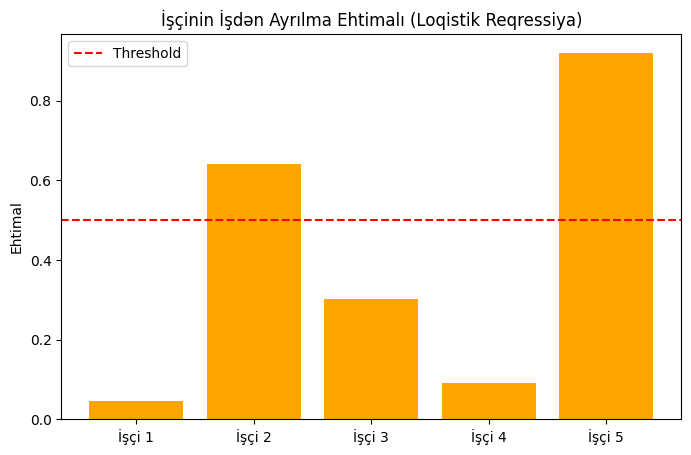

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

data = {
    'Yas': [25, 40, 35, 28, 50],
    'Maas': [3000, 5000, 4500, 3200, 6000],
    'Is_Muddeti': [2, 10, 5, 3, 15],
    'Memnuniyyet_Skoru': [8, 5, 6, 7, 4],
    'Ayrilma': [0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

X = df[['Yas', 'Maas', 'Is_Muddeti', 'Memnuniyyet_Skoru']]
y = df['Ayrilma']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

# Ehtimallar
y_prob = model.predict_proba(X_scaled)[:, 1]

# Vizual
plt.figure(figsize=(8, 5))
plt.bar(range(len(y_prob)), y_prob, color='orange')
plt.xticks(range(len(y_prob)), [f'İşçi {i+1}' for i in range(len(y_prob))])
plt.axhline(0.5, color='red', linestyle='--', label='Threshold')
plt.title('İşçinin İşdən Ayrılma Ehtimalı (Loqistik Reqressiya)')
plt.ylabel('Ehtimal')
plt.legend()
plt.show()


### Xülasə 📌

Loqistik reqressiya kimi təsnifat modelləri, gerçək həyatda:

- Xəstəlik diaqnozunda 🏥,
- Müştərinin satınalma davranışında 🛒,
- Maliyyə risk qiymətləndirməsində 💰,
- Kadr idarəçiliyində 👥
- və.s sahələrdə istifadə olunur.

Bu sahələrdə modelin əsas vəzifəsi, bir hadisənin baş vermə ehtimalını proqnozlaşdırmaq və buna uyğun olaraq qərar proseslərinə dəstək verməkdir.